# Entrega projeto final - CoderHouse

## Projeto realizado por Lucy Gomes de Souza (Turma 63825)

e-mail: souzalucyg@gmail.com, LinkedIn: https://www.linkedin.com/in/lucy-souza/

### Objeto de pesquisa: Exame clínico neuropsicológico

#### Contexto:

Durante atividades de educação, os estudantes frequentemente enfrentam níveis variados de estresse e engajamento emocional, o que pode impactar diretamente seu desempenho e bem-estar. No entanto, as instituições de ensino carecem de ferramentas eficazes para monitorar e avaliar, em tempo real, o estado psicológico dos alunos, dificultando intervenções proativas e personalizadas.

#### Problema:

A falta de um sistema integrado que utilize dados fisiológicos, comportamentais e ambientais coletados por biossensores para avaliar o estado psicológico dos estudantes durante atividades educacionais resulta em:

- Dificuldade em identificar sinais precoces de estresse e desengajamento emocional.

- Falta de personalização no suporte oferecido aos estudantes.

- Perda de oportunidades para melhorar a eficácia das atividades educacionais e o bem-estar mental dos alunos.

#### Solução proposta:

Desenvolver uma plataforma baseada em machine learning que analise, em tempo real, dados coletados por biossensores para:

- Identificar o estado psicológico, níveis de estresse e engajamento emocional dos estudantes.

- Fornecer insights e alertas para professores e gestores educacionais, permitindo intervenções imediatas.

- Personalizar o suporte e as atividades educacionais com base no estado emocional de cada estudante.

#### Benefícios:

- Melhoria do bem-estar mental e do desempenho acadêmico dos estudantes.

- Aumento do engajamento emocional durante atividades educacionais.

- Redução do estresse e prevenção de problemas de saúde mental.

- Otimização do ambiente educacional e das metodologias de ensino.

#### Público-Alvo:

Instituições de ensino, empresas de tecnologia educacional e pesquisadores interessados em aplicar biossensores e machine learning para melhorar a experiência educacional e o suporte à saúde mental.

#### Objetivos:

Criar uma solução inovadora que utilize tecnologia de ponta para transformar dados em ações práticas, promovendo um ambiente educacional mais saudável, engajador e eficaz.

#### Pergunta:



A contrução de um sistema integrado que utilize dados fisiológicos, comportamentais e ambientais coletados por biossensores possui suficiente correlação com a carga cognitiva para que possamos construir um algorítimo de machine learning capaz, de forma confiável, a carga cognitiva de uma pessoa?

### 0.Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import warnings
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, mean_squared_error, average_precision_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, classification_report, auc
from sklearn.preprocessing import label_binarize
from sklearn.inspection import permutation_importance

### 1.Dataset (Data Acquisition )

#### 1.1.Origem e informação sobre o dataset

Site de origem: https://www.kaggle.com/datasets/ziya07/psychological-state-identification-dataset

**Sobre este arquivo**

O conjunto de dados representa informações fisiológicas, comportamentais, ambientais e relacionadas a tarefas, coletadas por biossensores de indivíduos, principalmente estudantes, durante atividades educacionais. Foi criado para facilitar tarefas de aprendizado de máquina, como identificação em tempo real do estado psicológico, análise de estresse e avaliação do engajamento emocional.

**Principais Destaques**

Formato do Arquivo: CSV.
Total de Registros: 1.000 linhas.
Total de Recursos: Mais de 20 colunas, incluindo dados fisiológicos (ex.: HRV, GSR), condições ambientais, métricas de engajamento comportamental e detalhes demográficos.

#### 1.2.Carregando dataset

In [ ]:
# 1. importação dataset
df = pd.read_csv("psychological_state_dataset.csv")

#### 1.3.Visualização inicial

In [ ]:
df.head()

,ID,Time,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
0,1,2024-01-01 00:00:00,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
1,2,2024-01-01 00:00:01,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
2,3,2024-01-01 00:00:02,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
3,4,2024-01-01 00:00:03,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering
4,5,2024-01-01 00:00:04,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering


**Características do Conjunto de Dados**

**Dados Fisiológicos**
Essas características são coletadas de biossensores para avaliar estados psicológicos e emocionais:

- Variabilidade da Frequência Cardíaca (HRV) (ms): Indica estados de estresse e relaxamento.
- Resposta Galvânica da Pele (GSR) (μS): Reflete o estresse por meio de mudanças na condutividade da pele.
- Bandas de Potência EEG: Captura a atividade cerebral nas bandas Delta, Alfa e Beta.
- Pressão Arterial (Sistólica/Diastólica) (mmHg): Mede a resposta cardiovascular.
- Saturação de Oxigênio (SpO₂) (%): Indica os níveis de oxigênio no sangue.
- Frequência Cardíaca (BPM): Mostra excitação física ou emocional.
- Taxa de Respiração (BPM): Mede a atividade respiratória.
- Temperatura da Pele (°C): Indica níveis de estresse ou conforto.

**Fatores Ambientais**
Atributos ambientais que podem influenciar os estados psicológicos dos estudantes:

- Nível de Ruído Ambiente (dB): Intensidade do ruído durante as atividades educacionais.
- Luz Ambiente (lux): Níveis de iluminação que afetam o humor e o foco.
- Temperatura do Ambiente (°C): Temperatura do ambiente durante a sessão.

**Características Comportamentais**
Dados comportamentais que indicam foco e engajamento:

- Duração do Foco (s): Tempo gasto em atenção sustentada em uma tarefa.
- Velocidade de Digitação (WPM): Reflete carga cognitiva e estresse.
- Frequência de Cliques/Interações: Rastreia o nível de engajamento.

**Contexto Psicológico**
Estados psicológicos auto-relatados ou inferidos:

- Carga Cognitiva **(TARGET)**: (Baixa, Moderada, Alta) refletindo o esforço mental.
- Estado de Humor: (Feliz, Neutro, Triste, Ansioso) representando condições emocionais.
- Estado Psicológico: (Estressado, Relaxado, Focado, Ansioso) inferido a partir de dados de biossensores.

**Metadados da Tarefa**
Detalhes das atividades educacionais:

- Tipo de Tarefa: (Palestra, Discussão em Grupo, Trabalho, Prova).
- Dificuldade Percebida da Tarefa: Escala de dificuldade auto-relatada (1–10).

**Demografia**
Atributos que descrevem os participantes:

- Idade: Idade do participante.
- Gênero: Gênero do participante (Masculino, Feminino, Outro).
- Nível Educacional: (Ensino Médio, Graduação, Pós-Graduação).
- Área de Estudo: (Ciências, Artes, Engenharia).

#### 1.4.Explorando dataset

In [ ]:
df.shape

(1000, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   Time                    1000 non-null   object 
 2   HRV (ms)                1000 non-null   float64
 3   GSR (μS)                1000 non-null   float64
 4   EEG Power Bands         1000 non-null   object 
 5   Blood Pressure (mmHg)   1000 non-null   object 
 6   Oxygen Saturation (%)   1000 non-null   float64
 7   Heart Rate (BPM)        1000 non-null   int64  
 8   Ambient Noise (dB)      1000 non-null   float64
 9   Cognitive Load          1000 non-null   object 
 10  Mood State              1000 non-null   object 
 11  Psychological State     1000 non-null   object 
 12  Respiration Rate (BPM)  1000 non-null   int64  
 13  Skin Temp (°C)          1000 non-null   float64
 14  Focus Duration (s)      1000 non-null   i

In [ ]:
df.describe()

,ID,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.920454,0.995749,97.419577,78.829000,49.825774,18.061000,34.988254,154.499000,23.477000
std,288.819436,9.863658,0.285758,1.442865,11.818097,11.745028,3.719558,0.567596,84.098922,3.420698
min,1.000000,17.405557,0.501567,95.001452,60.000000,30.017619,12.000000,34.001039,10.000000,18.000000
25%,250.750000,43.019097,0.736509,96.154447,68.000000,39.462492,15.000000,34.512701,83.750000,21.000000
50%,500.500000,49.982476,0.999965,97.395945,78.000000,50.012015,18.000000,34.974199,156.000000,23.000000
75%,750.250000,56.538365,1.239964,98.643364,89.000000,59.690683,21.000000,35.459442,227.000000,27.000000
max,1000.000000,78.841149,1.499563,99.997277,99.000000,69.902683,24.000000,35.997964,299.000000,29.000000


In [ ]:
df.isnull().sum()

,0
ID,0
Time,0
HRV (ms),0
GSR (μS),0
EEG Power Bands,0
Blood Pressure (mmHg),0
Oxygen Saturation (%),0
Heart Rate (BPM),0
Ambient Noise (dB),0
Cognitive Load,0


In [ ]:
df.duplicated().sum()

0

#### 2.Preparação dos Dados (Data Wrangling )

##### 2.1.Transformando Time de object em datetime

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      1000 non-null   int64         
 1   Time                    1000 non-null   datetime64[ns]
 2   HRV (ms)                1000 non-null   float64       
 3   GSR (μS)                1000 non-null   float64       
 4   EEG Power Bands         1000 non-null   object        
 5   Blood Pressure (mmHg)   1000 non-null   object        
 6   Oxygen Saturation (%)   1000 non-null   float64       
 7   Heart Rate (BPM)        1000 non-null   int64         
 8   Ambient Noise (dB)      1000 non-null   float64       
 9   Cognitive Load          1000 non-null   object        
 10  Mood State              1000 non-null   object        
 11  Psychological State     1000 non-null   object        
 12  Respiration Rate (BPM)  1000 non-null   int64    

##### 2.2.Ajustando a coluna 'EEG Power Bands'

In [ ]:
df['EEG Power Bands'][0]

'[0.7583653347946298, 1.423247998317594, 0.6157696670741735]'

Cada lista corresponde a um paciente, cada valor dentro desta lista corresponde a leitura de um eletrodo. Como listas não são lidas pelos algorítimos, o melhor procedimento é quebrar essa coluna em 3, indicando separadamente o valor de leitura individual de cada eletrodo.

In [ ]:
# 1. Remover colchetes e dividir os valores em colunas separadas
expanded_columns = df['EEG Power Bands'].str.strip('[]').str.split(', ', expand=True)

# 2. Renomear as colunas para algo significativo
expanded_columns.columns = [f'EEG_Band_{i+1}' for i in range(expanded_columns.shape[1])]

# 3. Concatenar as novas colunas ao DataFrame original
df = pd.concat([df, expanded_columns], axis=1)

In [ ]:
df.head()

,ID,Time,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,...,Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major,EEG_Band_1,EEG_Band_2,EEG_Band_3
0,1,2024-01-01 00:00:00,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,...,34.566484,27,Exam,22,Female,Postgraduate,Engineering,0.7583653347946298,1.423247998317594,0.6157696670741735
1,2,2024-01-01 00:00:01,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,...,35.358593,282,Assignment,23,Male,Undergraduate,Arts,0.5520419333516282,1.858065835142619,0.3766051098968099
2,3,2024-01-01 00:00:02,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,...,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts,1.0261365005886114,1.3504934190994182,2.3087693587935796
3,4,2024-01-01 00:00:03,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,...,34.802638,223,Exam,28,Female,High School,Engineering,1.6075723109471591,1.6619672129812242,0.3441338973835159
4,5,2024-01-01 00:00:04,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,...,35.869862,201,Group Discussion,24,Female,High School,Engineering,1.055003922514022,0.7643319894343756,1.0745366952073125


In [ ]:
df[[f'EEG_Band_{i+1}' for i in range(expanded_columns.shape[1])]] = expanded_columns.astype(float)

In [ ]:
del df['EEG Power Bands']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      1000 non-null   int64         
 1   Time                    1000 non-null   datetime64[ns]
 2   HRV (ms)                1000 non-null   float64       
 3   GSR (μS)                1000 non-null   float64       
 4   Blood Pressure (mmHg)   1000 non-null   object        
 5   Oxygen Saturation (%)   1000 non-null   float64       
 6   Heart Rate (BPM)        1000 non-null   int64         
 7   Ambient Noise (dB)      1000 non-null   float64       
 8   Cognitive Load          1000 non-null   object        
 9   Mood State              1000 non-null   object        
 10  Psychological State     1000 non-null   object        
 11  Respiration Rate (BPM)  1000 non-null   int64         
 12  Skin Temp (°C)          1000 non-null   float64  

##### 2.3.Ajustando a coluna 'Blood Pressure (mmHg)'

In [ ]:
# 1. Dividindo a coluna 'Blood Pressure (mmHg)' em duas novas colunas
df[['Blood Pressure (systolic)', 'Blood Pressure (diastolic)']] = df['Blood Pressure (mmHg)'].str.split('/', expand=True)

# 2. Convertendo os valores das novas colunas para o tipo numérico
df['Blood Pressure (systolic)'] = pd.to_numeric(df['Blood Pressure (systolic)'])
df['Blood Pressure (diastolic)'] = pd.to_numeric(df['Blood Pressure (diastolic)'])

# 3. Removendo a coluna original, se necessário
df = df.drop(columns=['Blood Pressure (mmHg)'])

df.head()


,ID,Time,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,...,Task Type,Age,Gender,Educational Level,Study Major,EEG_Band_1,EEG_Band_2,EEG_Band_3,Blood Pressure (systolic),Blood Pressure (diastolic)
0,1,2024-01-01 00:00:00,33.039739,1.031806,98.433312,98,56.863054,Low,Anxious,Stressed,...,Exam,22,Female,Postgraduate,Engineering,0.758365,1.423248,0.615770,114,79
1,2,2024-01-01 00:00:01,49.914651,1.340983,98.944505,70,45.343430,Low,Neutral,Stressed,...,Assignment,23,Male,Undergraduate,Arts,0.552042,1.858066,0.376605,113,86
2,3,2024-01-01 00:00:02,67.894401,1.006014,95.990753,91,50.029264,High,Sad,Relaxed,...,Group Discussion,18,Female,Postgraduate,Arts,1.026137,1.350493,2.308769,124,74
3,4,2024-01-01 00:00:03,34.705373,0.849270,98.173643,95,60.802104,Low,Neutral,Anxious,...,Exam,28,Female,High School,Engineering,1.607572,1.661967,0.344134,120,73
4,5,2024-01-01 00:00:04,52.896549,0.879084,96.225051,65,40.696384,High,Anxious,Stressed,...,Group Discussion,24,Female,High School,Engineering,1.055004,0.764332,1.074537,111,80


##### 2.4.Ajustando a coluna 'Educational Level'

In [ ]:
# 1. Criando o objeto LabelEncoder
encoder = LabelEncoder()

# 2. Aplicando o encoder na coluna
df['Educational_Level_encoded'] = encoder.fit_transform(df['Educational Level'])

# 3. Exibindo os valores codificados
df.head()

,ID,Time,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,...,Age,Gender,Educational Level,Study Major,EEG_Band_1,EEG_Band_2,EEG_Band_3,Blood Pressure (systolic),Blood Pressure (diastolic),Educational_Level_encoded
0,1,2024-01-01 00:00:00,33.039739,1.031806,98.433312,98,56.863054,Low,Anxious,Stressed,...,22,Female,Postgraduate,Engineering,0.758365,1.423248,0.615770,114,79,1
1,2,2024-01-01 00:00:01,49.914651,1.340983,98.944505,70,45.343430,Low,Neutral,Stressed,...,23,Male,Undergraduate,Arts,0.552042,1.858066,0.376605,113,86,2
2,3,2024-01-01 00:00:02,67.894401,1.006014,95.990753,91,50.029264,High,Sad,Relaxed,...,18,Female,Postgraduate,Arts,1.026137,1.350493,2.308769,124,74,1
3,4,2024-01-01 00:00:03,34.705373,0.849270,98.173643,95,60.802104,Low,Neutral,Anxious,...,28,Female,High School,Engineering,1.607572,1.661967,0.344134,120,73,0
4,5,2024-01-01 00:00:04,52.896549,0.879084,96.225051,65,40.696384,High,Anxious,Stressed,...,24,Female,High School,Engineering,1.055004,0.764332,1.074537,111,80,0


In [ ]:
df = df.drop(columns=['Educational Level'])

##### 2.5.Ajustando as colunas com tipo 'object'

In [ ]:
# 1. Especificar as colunas a serem transformadas
cols_to_encode = ['Mood State', 'Psychological State', 'Task Type', 'Gender', 'Study Major']

# 2. Aplicar pd.get_dummies nas colunas especificadas com drop_first=True
df = pd.get_dummies(df, columns=cols_to_encode)

# 3. Ver o resultado
df.head()

,ID,Time,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Respiration Rate (BPM),Skin Temp (°C),...,Task Type_Assignment,Task Type_Exam,Task Type_Group Discussion,Task Type_Lecture,Gender_Female,Gender_Male,Gender_Other,Study Major_Arts,Study Major_Engineering,Study Major_Science
0,1,2024-01-01 00:00:00,33.039739,1.031806,98.433312,98,56.863054,Low,21,34.566484,...,False,True,False,False,True,False,False,False,True,False
1,2,2024-01-01 00:00:01,49.914651,1.340983,98.944505,70,45.343430,Low,21,35.358593,...,True,False,False,False,False,True,False,True,False,False
2,3,2024-01-01 00:00:02,67.894401,1.006014,95.990753,91,50.029264,High,17,34.359495,...,False,False,True,False,True,False,False,True,False,False
3,4,2024-01-01 00:00:03,34.705373,0.849270,98.173643,95,60.802104,Low,12,34.802638,...,False,True,False,False,True,False,False,False,True,False
4,5,2024-01-01 00:00:04,52.896549,0.879084,96.225051,65,40.696384,High,14,35.869862,...,False,False,True,False,True,False,False,False,True,False


***Transformando as novas colunas booleanas em inteiro:***

###### 2.5.1.Ajustando a coluna 'Mood State'

In [ ]:
#ajuste tradicional

#df['Mood State_Anxious'] = df['Mood State_Anxious'].astype(int)
#df['Mood State_Happy'] = df['Mood State_Happy'].astype(int)
#df['Mood State_Neutral'] = df['Mood State_Neutral'].astype(int)
#df['Mood State_Sad'] = df['Mood State_Sad'].astype(int)

In [ ]:
#ajuste utilizando for

lista_mood = ['Mood State_Anxious', 'Mood State_Happy', 'Mood State_Neutral', 'Mood State_Sad']

for i in lista_mood:
  df[i] = df[i].astype(int)


###### 2.5.2.Ajustando a coluna 'Psychological State'

In [ ]:
#ajuste tradicional

#df['Psychological State_Anxious'] = df['Psychological State_Anxious'].astype(int)
#df['Psychological State_Focused'] = df['Psychological State_Focused'].astype(int)
#df['Psychological State_Relaxed'] = df['Psychological State_Relaxed'].astype(int)
#df['Psychological State_Stressed'] = df['Psychological State_Stressed'].astype(int)

In [ ]:
#ajuste utilizando for

lista_psychological = ['Psychological State_Anxious', 'Psychological State_Focused', 'Psychological State_Relaxed', 'Psychological State_Stressed']

for i in lista_psychological:
  df[i] = df[i].astype(int)

###### 2.5.3.Ajustando a coluna 'Task Type'

In [ ]:
#ajuste tradicional

#df['Task Type_Assignment'] = df['Task Type_Assignment'].astype(int)
#df['Task Type_Exam'] = df['Task Type_Exam'].astype(int)
#df['Task Type_Group Discussion'] = df['Task Type_Group Discussion'].astype(int)
#df['Task Type_Lecture'] = df['Task Type_Lecture'].astype(int)

In [ ]:
#ajuste utilizando for

lista_task = ['Task Type_Assignment', 'Task Type_Exam', 'Task Type_Group Discussion', 'Task Type_Lecture']

for i in lista_task:
  df[i] = df[i].astype(int)

###### 2.5.4.Ajustando a coluna 'Gender'

In [ ]:
#ajuste tradicional

#df['Gender_Female'] = df['Gender_Female'].astype(int)
#df['Gender_Male'] = df['Gender_Male'].astype(int)
#df['Gender_Other'] = df['Gender_Other'].astype(int)

In [ ]:
#ajuste utilizando for

lista_gender = ['Gender_Female', 'Gender_Male', 'Gender_Other']

for i in lista_gender:
  df[i] = df[i].astype(int)

###### 2.5.5.Ajustando a coluna 'Study Major'

In [ ]:
#ajuste tradicional

#df['Study Major_Arts'] = df['Study Major_Arts'].astype(int)
#df['Study Major_Engineering'] = df['Study Major_Engineering'].astype(int)
#df['Study Major_Science'] = df['Study Major_Science'].astype(int)

In [ ]:
#ajuste utilizando for

lista_study = ['Study Major_Arts', 'Study Major_Engineering', 'Study Major_Science']

for i in lista_study:
  df[i] = df[i].astype(int)

***Resultados finais das alterações:***

In [ ]:
df.head()

,ID,Time,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Respiration Rate (BPM),Skin Temp (°C),...,Task Type_Assignment,Task Type_Exam,Task Type_Group Discussion,Task Type_Lecture,Gender_Female,Gender_Male,Gender_Other,Study Major_Arts,Study Major_Engineering,Study Major_Science
0,1,2024-01-01 00:00:00,33.039739,1.031806,98.433312,98,56.863054,Low,21,34.566484,...,0,1,0,0,1,0,0,0,1,0
1,2,2024-01-01 00:00:01,49.914651,1.340983,98.944505,70,45.343430,Low,21,35.358593,...,1,0,0,0,0,1,0,1,0,0
2,3,2024-01-01 00:00:02,67.894401,1.006014,95.990753,91,50.029264,High,17,34.359495,...,0,0,1,0,1,0,0,1,0,0
3,4,2024-01-01 00:00:03,34.705373,0.849270,98.173643,95,60.802104,Low,12,34.802638,...,0,1,0,0,1,0,0,0,1,0
4,5,2024-01-01 00:00:04,52.896549,0.879084,96.225051,65,40.696384,High,14,35.869862,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            1000 non-null   int64         
 1   Time                          1000 non-null   datetime64[ns]
 2   HRV (ms)                      1000 non-null   float64       
 3   GSR (μS)                      1000 non-null   float64       
 4   Oxygen Saturation (%)         1000 non-null   float64       
 5   Heart Rate (BPM)              1000 non-null   int64         
 6   Ambient Noise (dB)            1000 non-null   float64       
 7   Cognitive Load                1000 non-null   object        
 8   Respiration Rate (BPM)        1000 non-null   int64         
 9   Skin Temp (°C)                1000 non-null   float64       
 10  Focus Duration (s)            1000 non-null   int64         
 11  Age                           1

### 3.Análises exploratórias do dataset

#### 3.1.Correlação das features

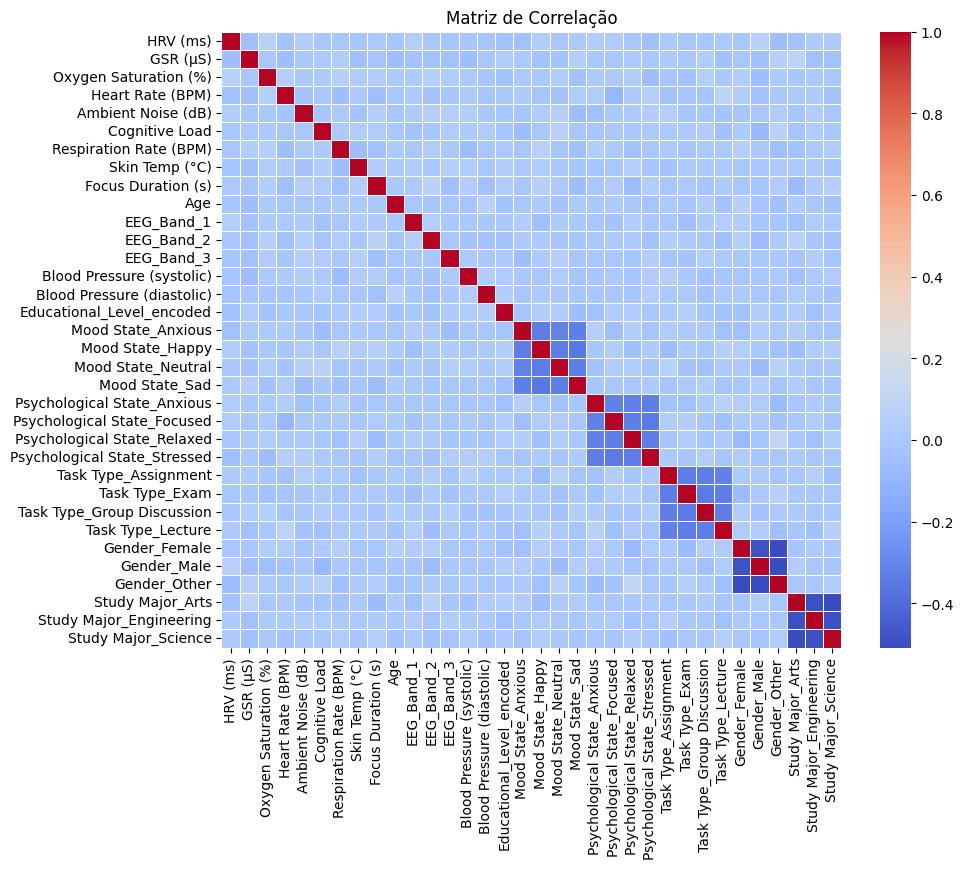

In [ ]:
# 1. Remover colunas não funcionais
df_corr = df.drop(columns=['ID', 'Time'])

# 2. Codificar a coluna 'Cognitive Load' para valores numéricos
label_encoder = LabelEncoder()
df_corr['Cognitive Load'] = label_encoder.fit_transform(df_corr['Cognitive Load'])

# 3. Calcular a matriz de correlação
correlacao = df_corr.corr()

# 4. Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
# 1. Extrair as correlações com 'Cognitive Load'
cognitive_load_corr = correlacao['Cognitive Load']

# 2. Remover a correlação de 'Cognitive Load_encoded' consigo mesma
cognitive_load_corr = cognitive_load_corr.drop('Cognitive Load')

# 6. Encontrar a feature com maior e menor correlação
max_corr_feature = cognitive_load_corr.idxmax()
max_corr_value = cognitive_load_corr.max()

min_corr_feature = cognitive_load_corr.idxmin()
min_corr_value = cognitive_load_corr.min()

# 7. Exibir os resultados
print(f"Feature com maior correlação com 'Cognitive Load': {max_corr_feature} (Correlação = {max_corr_value:.4f})")
print(f"Feature com menor correlação com 'Cognitive Load': {min_corr_feature} (Correlação = {min_corr_value:.4f})")

Feature com maior correlação com 'Cognitive Load': Mood State_Neutral (Correlação = 0.0638)
Feature com menor correlação com 'Cognitive Load': Gender_Male (Correlação = -0.0816)


In [ ]:
# 1. Remoção dos valores da diagonal
np.fill_diagonal(correlacao.values, np.nan)

# 2. Encontrar o valor máximo e mínimo de correlação
max_corr = correlacao.max().max()  # Maior valor na matriz
min_corr = correlacao.min().min()  # Menor valor na matriz

# 3. Encontrar as variáveis associadas aos valores extremos
# 3.1. Máximo
max_pair = correlacao.stack().idxmax()  # Par de variáveis com maior correlação
# 3.2. Mínimo
min_pair = correlacao.stack().idxmin()  # Par de variáveis com menor correlação

# 4. Exibir resultados
print(f"Maior correlação: {max_corr:.2f} entre {max_pair[0]} e {max_pair[1]}")
print(f"Menor correlação: {min_corr:.2f} entre {min_pair[0]} e {min_pair[1]}")

Maior correlação: 0.10 entre Psychological State_Relaxed e Gender_Other
Menor correlação: -0.51 entre Study Major_Arts e Study Major_Science


In [ ]:
# 1. Definir um limite para correlação próxima a 0
limite = 0.1

# 2. Filtrar correlações próximas a 0
correlacao_proxima_zero = correlacao[(correlacao.abs() < limite) & (correlacao != 1)]  # Exclui a diagonal (correlação de 1)

# 3. Exibir as features com correlação próxima a 0
print("Features com correlação próxima a 0:")
print(correlacao_proxima_zero.stack().dropna())

Features com correlação próxima a 0:
HRV (ms)             GSR (μS)                     -0.054000
                     Oxygen Saturation (%)         0.057388
                     Heart Rate (BPM)             -0.033514
                     Ambient Noise (dB)            0.036195
                     Cognitive Load               -0.008653
                                                     ...   
Study Major_Science  Task Type_Group Discussion   -0.006196
                     Task Type_Lecture             0.056538
                     Gender_Female                -0.000945
                     Gender_Male                  -0.023446
                     Gender_Other                  0.024105
Length: 1074, dtype: float64


##### Comentários:

**Relação entre as features e o target:**
De acordo com as correlações apresentadas pelo heatmap nota-se que todas as features do dataset possuem baixa correlação com o target, sendo o máximo positivo o Mood State_Neutral (Correlação = 0.0638) e o máximo negativo o Gender_Male (Correlação = -0.0816). A correlação mede apenas relações lineares. Se as variáveis estiverem relacionadas de forma não linear, a correlação pode ser baixa, mas o modelo ainda pode aprender padrões úteis (por isso nenhuma feature será descartada). No entanto, se nenhuma feature tem correlação com o target, pode indicar que as variáveis escolhidas não têm influência significativa na variável resposta.

**Relação entre as features:**
Como observado no heatmap a maior correlação positiva do dataset foi encontrada entre as features Psychological State_Relaxed e Gender_Other com valor de 0.10, mostrando, portanto uma fraca correlação positiva (se um aumenta o outro também aumentária). Além disso, a maior parte da relação entre as features estudadas gira em torno de 0 (ver exemplo acima da relação das features HRV (ms) e Study Major_Science com algumas outras features). Isso demonstra uma correlação muito fraca ou até mesmo práticamente ausente. Em torno da diagonal principal do heatmap encontramos algumas features com correlações negativas maiores que -0.2, tendo -0.51 (entre Study Major_Arts e Study Major_Science) o maior valor encontrado. A correlação negativa indica que enquanto uma feature varia em um sentido a outra variará no sentido oposto. Vale ressaltar que de modo geral as correlções observadas vão de muito fracas até negativamente moderadas.

#### 3.2.Extraindo informações das features

##### 3.2.1.Distribuição das classes

<ipython-input-79-d491c1bbfb2b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_mapped, palette="Set2")


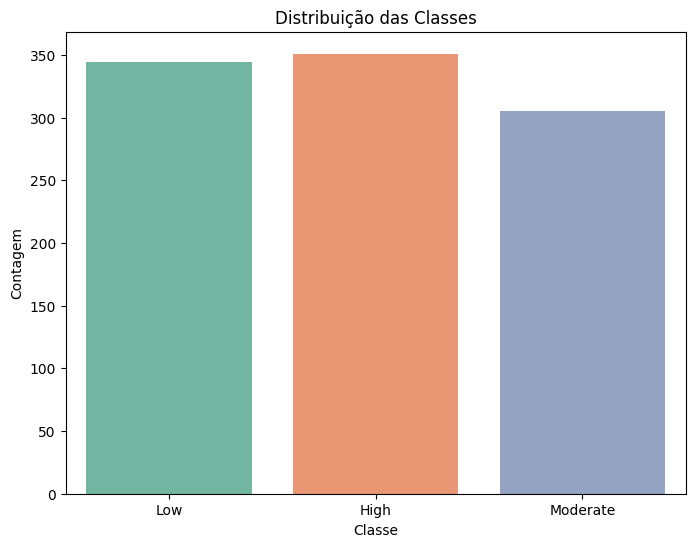

In [ ]:
# 1. Mapear valores numéricos para nomes das classes
class_names = {0: 'High', 1: 'Low', 2: 'Moderate'}
target_mapped = df['Cognitive Load'].tolist()

# 2. Plotar a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(x=target_mapped, palette="Set2")
plt.title("Distribuição das Classes")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()

##### 3.2.2.Verificando a relação de algumas features com o target

Dados fisiológicos e comportamentais, como, por exemplo, HRV, GSR e Respiration Rate (BPM), podem ter relações com a Cognitive Load devido à complexidade dos sistemas biológicos, limiares de resposta, variabilidade individual e efeitos cumulativos. Portando, como exemplo, faremos uma exploração da relação das features HRV, GSR e Respiration Rate (BPM) (escolhidas arbitrariamente como exemplos) com a Cognitive Load.

**obs:** Como a Cognitive Load é do tipo object, a análise de linearidade tradicional (que assume variáveis contínuas) não se aplica diretamente. No entanto, ainda é possível avaliar a relação entre as features contínuas (HRV, GSR, Respiration Rate (BPM)) e a Cognitive Load (categórica) usando gráficos adequados para esse tipo de dado.

###### 3.2.2.1.Boxplot (Gráfico de Caixa)

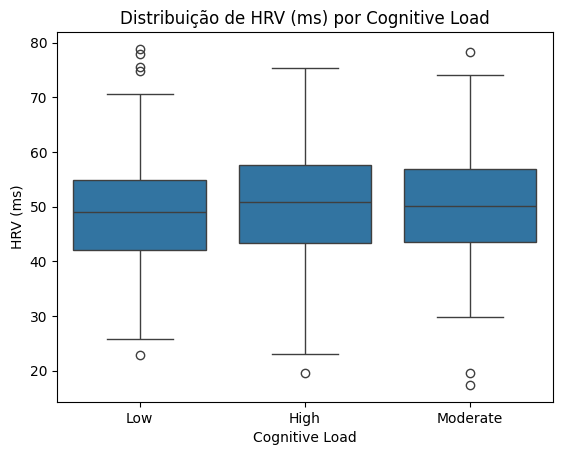

In [ ]:
# 1. Boxplot para HRV (ms) vs Cognitive Load
sns.boxplot(x='Cognitive Load', y='HRV (ms)', data=df)
plt.title('Distribuição de HRV (ms) por Cognitive Load')
plt.show()

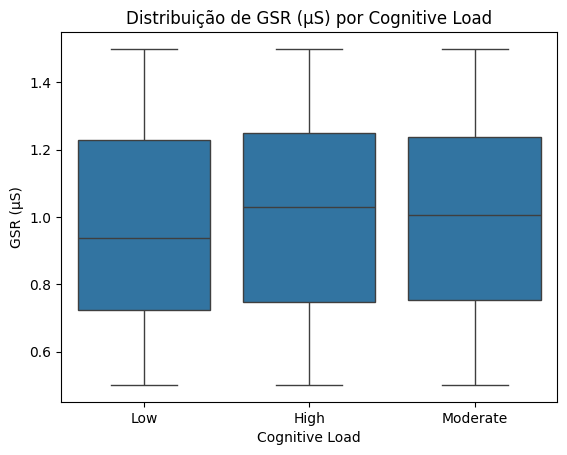

In [ ]:
# 1. Boxplot para GSR (μS) vs Cognitive Load
sns.boxplot(x='Cognitive Load', y='GSR (μS)', data=df)
plt.title('Distribuição de GSR (μS) por Cognitive Load')
plt.show()

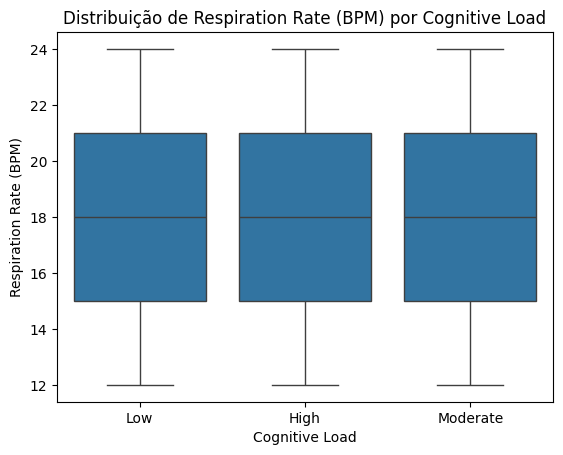

In [ ]:
# 1. Boxplot para Respiration Rate (BPM) vs Cognitive Load
sns.boxplot(x='Cognitive Load', y='Respiration Rate (BPM)', data=df)
plt.title('Distribuição de Respiration Rate (BPM) por Cognitive Load')
plt.show()

###### 3.2.2.2.Violin Plot (Gráfico de Violino)

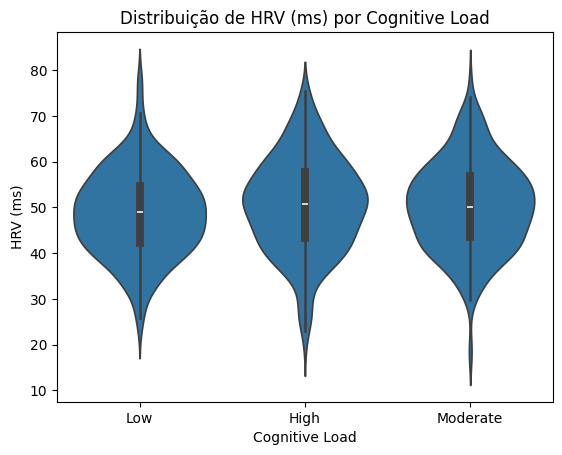

In [ ]:
# 1. Violin plot para HRV (ms) vs Cognitive Load
sns.violinplot(x='Cognitive Load', y='HRV (ms)', data=df)
plt.title('Distribuição de HRV (ms) por Cognitive Load')
plt.show()

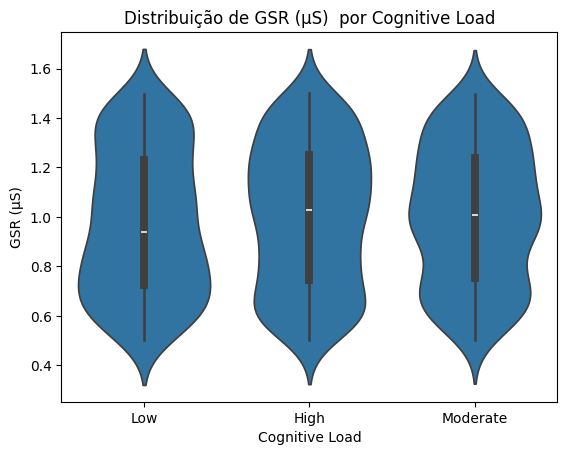

In [ ]:
# 1. Violin plot para GSR (μS)  vs Cognitive Load
sns.violinplot(x='Cognitive Load', y='GSR (μS)', data=df)
plt.title('Distribuição de GSR (μS)  por Cognitive Load')
plt.show()

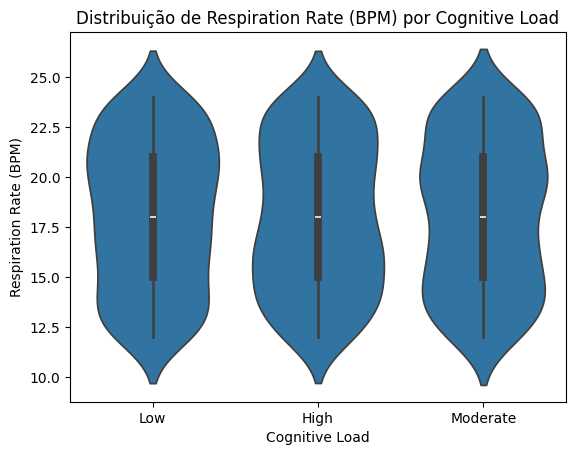

In [ ]:
# 1. Violin plot para Respiration Rate (BPM) vs Cognitive Load
sns.violinplot(x='Cognitive Load', y='Respiration Rate (BPM)', data=df)
plt.title('Distribuição de Respiration Rate (BPM) por Cognitive Load')
plt.show()

###### 3.2.2.3.Barplot (Gráfico de Barras)

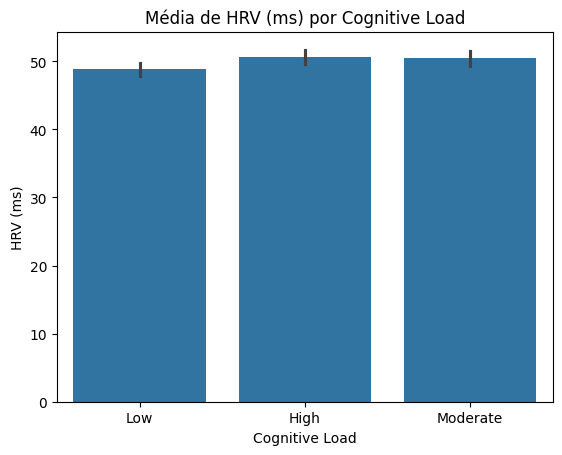

In [ ]:
# 1. Barplot para HRV (ms) vs Cognitive Load
sns.barplot(x='Cognitive Load', y='HRV (ms)', data=df, estimator='mean')  # Média
plt.title('Média de HRV (ms) por Cognitive Load')
plt.show()

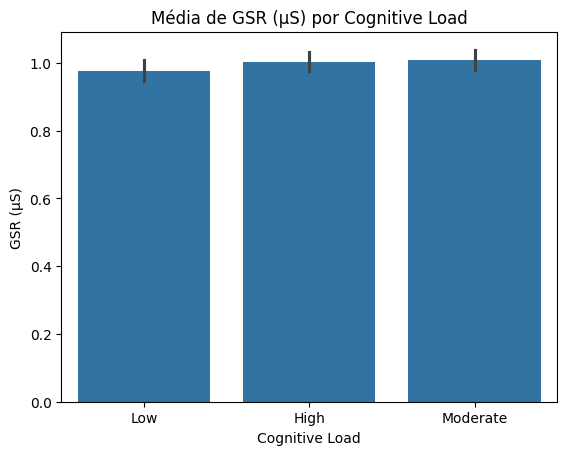

In [ ]:
# 1. Barplot para GSR (μS) vs Cognitive Load
sns.barplot(x='Cognitive Load', y='GSR (μS)', data=df, estimator='mean')
plt.title('Média de GSR (μS) por Cognitive Load')
plt.show()

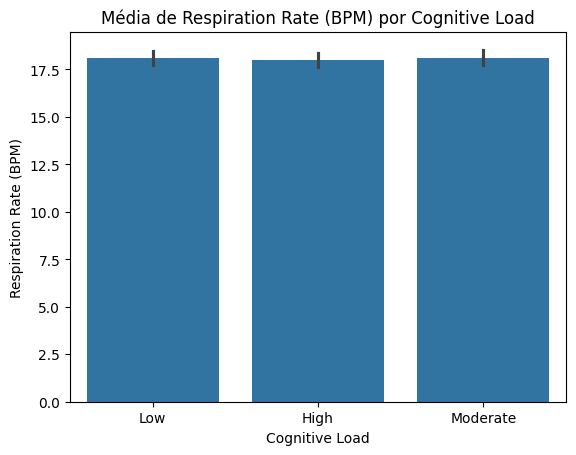

In [ ]:
# 1. Barplot para Respiration Rate (BPM) vs Cognitive Load
sns.barplot(x='Cognitive Load', y='Respiration Rate (BPM)', data=df, estimator='mean')
plt.title('Média de Respiration Rate (BPM) por Cognitive Load')
plt.show()

###### 3.2.2.4.Swarmplot (Gráfico de Enxame)

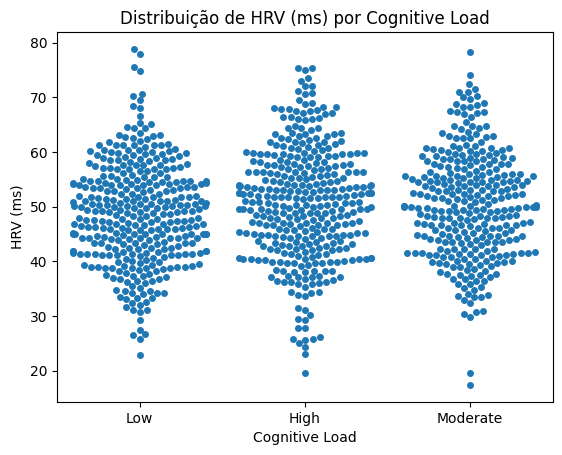

In [ ]:
# 1. Swarmplot para HRV (ms) vs Cognitive Load
sns.swarmplot(x='Cognitive Load', y='HRV (ms)', data=df)
plt.title('Distribuição de HRV (ms) por Cognitive Load')
plt.show()

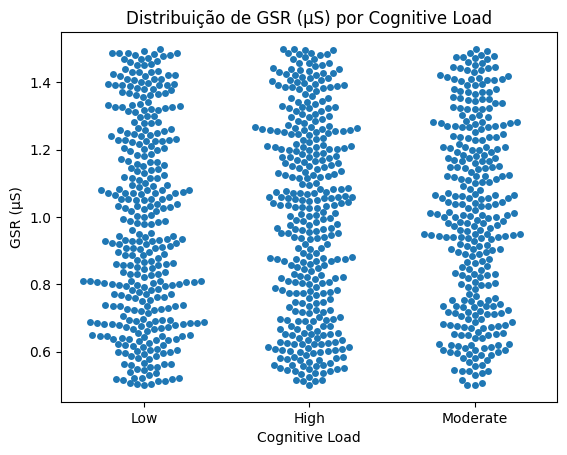

In [ ]:
# 1. Swarmplot para GSR (μS) vs Cognitive Load
sns.swarmplot(x='Cognitive Load', y='GSR (μS)', data=df)
plt.title('Distribuição de GSR (μS) por Cognitive Load')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.6% of the points cannot be placed

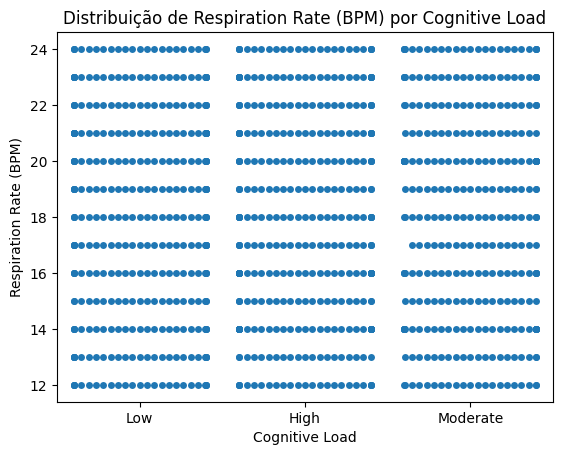

In [ ]:
# 1. Swarmplot para Respiration Rate (BPM) vs Cognitive Load
sns.swarmplot(x='Cognitive Load', y='Respiration Rate (BPM)', data=df)
plt.title('Distribuição de Respiration Rate (BPM) por Cognitive Load')
plt.show()

**COMENTÁRIOS**: os diferentes gráficos obtidos para as features contínuas (fisiológicas: HRV, GSR e Respiration Rate (BPM)) utilizadas como exemplo indicam uma variedade baixa destas features com as categorias possuídas pela variável target (cognitive load: low. high e moderate). Podemos observar, principalmente no gráfico de boxplot, que para HRV há uma pequena variação nas medidas de tendência central, com destaque para a média, e apresenta alguns poucos outliers. Apesar disso, optamos por não excluir essas variáveis, devido a baixa quantidade presente no dataset, nem seus outliers, devido a sua baixa quantidade. Além disso, os algorítimos escolhidos lidam bem com essas características (veja a sessão 5).  

### 4.Divisão dos dados

O dataset será separado em conjuntos de treino, validação e teste (respectivamente: 70% treino, 20% validação, 10% teste).

In [ ]:
# 1. Criando variável com dataset sem as colunas que não são informativas
df_analise = df.drop(columns=['ID', 'Time'])


# 2. Separando features e rótulo
X = df_analise.drop(columns=['Cognitive Load'])
y = df_analise['Cognitive Load']

# 3. Convertendo rótulos para números
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Agora 'High' -> 0, 'Low' -> 1, 'Moderate' -> 2

# 4. Aplicando a mesma lógica de divisão
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# 5. Verificando os tamanhos
print(X_train.shape, X_val.shape, X_test.shape)
print(f'Tamanho do treino: {len(X_train)}')
print(f'Tamanho da validação: {len(X_val)}')
print(f'Tamanho do teste: {len(X_test)}')

(700, 33) (200, 33) (100, 33)
Tamanho do treino: 700
Tamanho da validação: 200
Tamanho do teste: 100


### 5.Escolha do Algoritimo

Dado que a variável target Cognitive Load é do tipo object (provavelmente categórica), estamos lidando com um problema de classificação. O objetivo é prever a categoria de carga cognitiva com base nas features fornecidas. Abaixo estão os algoritmos de machine learning sugeridos para esse tipo de problema, considerando as características do conjunto de dados e uma breve justificativa sobre seu uso:

**1.Árvores de Decisão (Decision Trees):**
*São simples, interpretáveis e lidam bem com dados numéricos e categóricos. Podem capturar relações não lineares entre as features e o target.*

**2.Florestas Aleatórias (Random Forests):**
*Melhoram as árvores de decisão ao combinar várias árvores, reduzindo o risco de overfitting. São robustas a features irrelevantes.*

**3.Gradient Boosting (escolhido o XGBoost):**
*São modelos poderosos que combinam várias árvores de decisão de forma sequencial, corrigindo os erros das árvores anteriores. Tendem a ter alta precisão.*

**4.Support Vector Machines (SVM):**
*São eficazes em problemas de classificação com um número moderado de features. Podem lidar com relações não lineares usando kernels.*

**5.K-Nearest Neighbors (KNN):**
*É um algoritmo simples baseado em distância que pode ser eficaz quando há padrões claros nos dados.*

**6.Regressão Logística (Logistic Regression):**
*É um modelo linear simples e interpretável, útil para problemas de classificação multiclasse.*

### 6.Análise (Treinamento e Avaliação do Modelo)

#### 6.1.Treinamento do modelo

In [ ]:
# 1. Suprimindo warnings desnecessários
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# 2. Criando os modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=13),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=13),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=13),
    "SVM": SVC(kernel='rbf', random_state=13),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=13)
}

# 3. Treinando e avaliando os modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Treinamento
    y_pred = model.predict(X_val)  # Previsão na validação
    acc = accuracy_score(y_val, y_pred)  # Avaliação
    results[name] = acc
    print(f"{name}: Acurácia = {acc:.4f}")

# 4. Convertendo os resultados para um DataFrame e ordenando
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# 5. Formatando a saída com tabulate
print("\n Resultados Finais:\n")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))

# 6. Destaque para o melhor modelo
best_model = results_df.idxmax()[0]
best_acc = results_df.max()[0]
print(f"\n Melhor Modelo: {best_model} com {best_acc:.4f} de acurácia!\n")

Decision Tree: Acurácia = 0.3350
Random Forest: Acurácia = 0.3500
XGBoost: Acurácia = 0.3000
SVM: Acurácia = 0.3100
KNN: Acurácia = 0.4000
Logistic Regression: Acurácia = 0.3200

 Resultados Finais:

╒═════════════════════╤════════════╕
│                     │   Accuracy │
╞═════════════════════╪════════════╡
│ KNN                 │     0.4000 │
├─────────────────────┼────────────┤
│ Random Forest       │     0.3500 │
├─────────────────────┼────────────┤
│ Decision Tree       │     0.3350 │
├─────────────────────┼────────────┤
│ Logistic Regression │     0.3200 │
├─────────────────────┼────────────┤
│ SVM                 │     0.3100 │
├─────────────────────┼────────────┤
│ XGBoost             │     0.3000 │
╘═════════════════════╧════════════╛

 Melhor Modelo: KNN com 0.4000 de acurácia!



#### 6.2.Validação do modelo

In [ ]:
# 1. Validação cruzada k-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Dicionário para armazenar os resultados
results = {}

# 3. Avaliando todos os modelos
for name, model in models.items():
    # 3.1. Validação Cruzada (Acurácia Média)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # 3.2. Treinamento no conjunto de treino
    model.fit(X_train, y_train)

    # 3.3. Previsão no conjunto de validação
    y_pred = model.predict(X_val)

    # 3.4. Cálculo das métricas
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    # 3.5. Salvando os resultados no dicionário
    results[name] = {
        "CV Accuracy": np.mean(cv_scores),
        "Validation Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "RMSE": rmse
    }

# 4. Convertendo resultados para DataFrame e ordenando
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by='Validation Accuracy', ascending=False)

# 5. Exibindo os resultados formatados
print("\n Resultados Finais com Métricas para Todos os Modelos:\n")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))

# 6. Melhor modelo baseado na acurácia de validação
best_model = results_df.idxmax()["Validation Accuracy"]
best_acc = results_df["Validation Accuracy"].max()
print(f"\n Melhor Modelo: {best_model} com {best_acc:.4f} de acurácia na validação!\n")

# 7. Relatório de Classificação para Todos os Modelos
for name, model in models.items():
    print(f"\n Relatório de Classificação para {name}:\n")
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))



 Resultados Finais com Métricas para Todos os Modelos:

╒═════════════════════╤═══════════════╤═══════════════════════╤═════════════╤══════════╤════════════╤════════╕
│                     │   CV Accuracy │   Validation Accuracy │   Precision │   Recall │   F1-score │   RMSE │
╞═════════════════════╪═══════════════╪═══════════════════════╪═════════════╪══════════╪════════════╪════════╡
│ KNN                 │        0.3614 │                0.4000 │      0.3761 │   0.4000 │     0.3716 │ 1.1023 │
├─────────────────────┼───────────────┼───────────────────────┼─────────────┼──────────┼────────────┼────────┤
│ Random Forest       │        0.3443 │                0.3500 │      0.3469 │   0.3500 │     0.3305 │ 1.0977 │
├─────────────────────┼───────────────┼───────────────────────┼─────────────┼──────────┼────────────┼────────┤
│ Decision Tree       │        0.3486 │                0.3350 │      0.3348 │   0.3350 │     0.3329 │ 1.1511 │
├─────────────────────┼───────────────┼────────────────

#### 6.3.Análise de resultados

##### 6.3.1.Análise Geral

Os resultados mostram que todos os modelos tiveram um desempenho relativamente fraco, com acurácias variando entre 30% e 40%. O melhor modelo foi o KNN (40% de acurácia na validação), mas ainda assim, esse valor é baixo para um bom modelo preditivo.

O baixo desempenho pode ser causado por diversos fatores, incluindo:

- Dados não suficientemente representativos (possível desbalanceamento nas classes).
- Falta de engenharia de atributos para extrair características mais relevantes.
- Modelos não ajustados corretamente (hiperparâmetros podem precisar de otimização).

##### 6.3.2.Comparação dos Modelos

- O KNN teve a melhor acurácia de validação (40%), seguido pelo Random Forest (35%).
- XGBoost e SVM foram os piores modelos, com apenas 30%-31% de acurácia.
- O RMSE (Raiz do Erro Quadrático Médio) mostra valores acima de 1.0, indicando que os erros são grandes.
- Precision, Recall e F1-score estão abaixo de 0.40 para todos os modelos, mostrando dificuldades em classificar corretamente as três classes.

##### 6.3.3.Análise dos modelos

- **KNN** (Melhor Modelo: 40% de Acurácia)

Vantagens: Melhor desempenho geral, maior recall para a classe "High" (63%).

Desvantagens: Baixo desempenho para a classe "Moderate", com recall de apenas 14%.

- **Random Forest** (35% de Acurácia)

Vantagens: Melhor precisão para a classe "High" (48%).

Desvantagens: Baixo recall para "Moderate" (14%), o que indica dificuldade em identificar essa classe corretamente.

- **Decision Tree** (33.5% de Acurácia)

Vantagens: Modelo interpretável e rápido.

Desvantagens: Resultado próximo ao Random Forest, mas sem os benefícios da combinação de múltiplas árvores.

- **Logistic Regression** (32% de Acurácia)

Vantagens: Simples e eficiente para dados lineares.

Desvantagens: Baixa performance para um problema possivelmente não linear.

- **SVM** (31% de Acurácia)

Vantagens: Geralmente bom para problemas complexos, mas...

Desvantagens: Pior precisão geral (20%), indicando que não conseguiu capturar bem os padrões dos dados.

- **XGBoost** (30% de Acurácia)

Vantagens: Um dos modelos mais poderosos para muitas tarefas, mas...

Desvantagens: Teve um dos piores desempenhos, o que pode indicar necessidade de ajuste de hiperparâmetros.

### 7.Otimização

**Técnicas de Otimização**
- **Grid Search**:
Testa todas as combinações possíveis de hiperparâmetros.
Mais preciso, mas demorado para grandes combinações.

- **Random Search**:
Testa amostras aleatórias dos hiperparâmetros.
Mais rápido, mas pode não encontrar a melhor combinação.

- **Validação Cruzada (Cross-Validation)**:
Divide os dados em K partes (K-Folds) e treina o modelo várias vezes.
Reduz o risco de overfitting.

#### 7.1.Ajuste de hiperparâmetros

In [ ]:
# 1. Hiperparâmetros para cada modelo
param_grids = {
    "Decision Tree": {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'subsample': [0.7, 0.8, 1.0]
    },
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    "KNN": {
        'n_neighbors': range(1, 30, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    }
}

**Observação:** Devido ao baixo poder de processamento do meu computador pessoal, toda análise foi feita no google colab. A otimização do SVM com RandomizedSearchCV não foi possível com o processador natural do google colab devido a limitação de tempo de processamento. Além disso, essa mesma análise foi feita com um processador A100 durante 3h e a análise não foi finalizada e o servidor derrubado. Como na análise inicial o SVM teve um dos piores desempenhos e somado as limitações de problemas mencionadas a cima o algoritimo de SVM não participará das etapas de otimização e teste.

In [ ]:
# 1. Modelos iniciais
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=13),
    "Random Forest": RandomForestClassifier(random_state=13),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=13),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=13)
}

# 2. Dicionários para armazenar os melhores modelos e resultados
best_models = {}
cv_results = {}

for name, model in models.items():
    print(f"\n Otimizando {name} com RandomizedSearchCV...")

    # 2.1. Aplicando RandomizedSearchCV
    random_search = RandomizedSearchCV(
        model,
        param_grids[name],
        cv=5,
        n_iter=10,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)
    best_random_model = random_search.best_estimator_

    print(f"Random Search - Melhor combinação de hiperparâmetros: {random_search.best_params_}")

    # 2.2. Aplicando Grid Search para refinar a busca
    print(f"\n Refinando {name} com GridSearchCV...")
    grid_search = GridSearchCV(
        best_random_model,
        param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_grid_model = grid_search.best_estimator_

    print(f"Grid Search - Melhor combinação de hiperparâmetros: {grid_search.best_params_}")

    # 2.3. Validação cruzada com o melhor modelo encontrado
    scores = cross_val_score(best_grid_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = (scores.mean(), scores.std())

    best_models[name] = best_grid_model

    print(f"Validação Cruzada: Média = {scores.mean():.4f}, Desvio Padrão = {scores.std():.4f}")



 Otimizando Decision Tree com RandomizedSearchCV...
Random Search - Melhor combinação de hiperparâmetros: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}

 Refinando Decision Tree com GridSearchCV...
Grid Search - Melhor combinação de hiperparâmetros: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Validação Cruzada: Média = 0.3614, Desvio Padrão = 0.0473

 Otimizando Random Forest com RandomizedSearchCV...
Random Search - Melhor combinação de hiperparâmetros: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}

 Refinando Random Forest com GridSearchCV...
Grid Search - Melhor combinação de hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Validação Cruzada: Média = 0.3543, Desvio Padrão = 0.0349

 Otimizando XGBoost com RandomizedSearchCV...
Random Search - Melhor combinação de hiperparâmetros: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 10, 'learning_rate'

***Aplicando a otimização RandomizedSearchCV nos modelos***



In [ ]:
# 1. Criando os modelos
models_RandomizedSearchCV = {
    "Decision Tree": DecisionTreeClassifier(min_samples_split= 10, min_samples_leaf= 4, max_depth= 5),
    "Random Forest": RandomForestClassifier(n_estimators= 500, min_samples_split= 5, min_samples_leaf= 2, max_depth= 10),
    "XGBoost": XGBClassifier(subsample= 0.7, n_estimators= 100, max_depth= 10, learning_rate= 0.01),
    "KNN": KNeighborsClassifier(weights= 'uniform', n_neighbors= 13, metric= 'euclidean'),
    "Logistic Regression": LogisticRegression(solver= 'lbfgs', C= 0.01)
}

# 2. Treinando e avaliando os modelos
results = {}
for name, model in models_RandomizedSearchCV.items():
    model.fit(X_train, y_train)  # Treinamento
    y_pred = model.predict(X_val)  # Previsão na validação
    acc = accuracy_score(y_val, y_pred)  # Avaliação
    results[name] = acc
    print(f"{name}: Acurácia = {acc:.4f}")

# 3. Convertendo os resultados para um DataFrame e ordenando
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# 4. Formatando a saída com tabulate
print("\n Resultados Finais:\n")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))

# 5. Destaque para o melhor modelo
best_model = results_df.idxmax()[0]
best_acc = results_df.max()[0]
print(f"\n Melhor Modelo: {best_model} com {best_acc:.4f} de acurácia!\n")

Decision Tree: Acurácia = 0.3400
Random Forest: Acurácia = 0.3500
XGBoost: Acurácia = 0.3100
KNN: Acurácia = 0.3400
Logistic Regression: Acurácia = 0.3200

 Resultados Finais:

╒═════════════════════╤════════════╕
│                     │   Accuracy │
╞═════════════════════╪════════════╡
│ Random Forest       │     0.3500 │
├─────────────────────┼────────────┤
│ Decision Tree       │     0.3400 │
├─────────────────────┼────────────┤
│ KNN                 │     0.3400 │
├─────────────────────┼────────────┤
│ Logistic Regression │     0.3200 │
├─────────────────────┼────────────┤
│ XGBoost             │     0.3100 │
╘═════════════════════╧════════════╛

 Melhor Modelo: Random Forest com 0.3500 de acurácia!



***Aplicando a otimização GridSearchCV nos modelos***

In [ ]:
# 1. Criando os modelos
models_GridSearchCV = {
    "Decision Tree": DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 4, min_samples_split= 2),
    "Random Forest": RandomForestClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200),
    "XGBoost": XGBClassifier(learning_rate= 0.2, max_depth= 10, n_estimators= 500, subsample= 1.0),
    "KNN": KNeighborsClassifier(metric= 'euclidean', n_neighbors= 27, weights= 'uniform'),
    "Logistic Regression": LogisticRegression(solver= 'lbfgs', C= 0.01)
}

# 2. Treinando e avaliando os modelos
results = {}
for name, model in models_GridSearchCV.items():
    model.fit(X_train, y_train)  # Treinamento
    y_pred = model.predict(X_val)  # Previsão na validação
    acc = accuracy_score(y_val, y_pred)  # Avaliação
    results[name] = acc
    print(f"{name}: Acurácia = {acc:.4f}")

# 3. Convertendo os resultados para um DataFrame e ordenando
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# 4. Formatando a saída com tabulate
print("\n Resultados Finais:\n")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))

# 5. Destaque para o melhor modelo
best_model = results_df.idxmax()[0]
best_acc = results_df.max()[0]
print(f"\n Melhor Modelo: {best_model} com {best_acc:.4f} de acurácia!\n")

Decision Tree: Acurácia = 0.3400
Random Forest: Acurácia = 0.3400
XGBoost: Acurácia = 0.3150
KNN: Acurácia = 0.3700
Logistic Regression: Acurácia = 0.3200

 Resultados Finais:

╒═════════════════════╤════════════╕
│                     │   Accuracy │
╞═════════════════════╪════════════╡
│ KNN                 │     0.3700 │
├─────────────────────┼────────────┤
│ Decision Tree       │     0.3400 │
├─────────────────────┼────────────┤
│ Random Forest       │     0.3400 │
├─────────────────────┼────────────┤
│ Logistic Regression │     0.3200 │
├─────────────────────┼────────────┤
│ XGBoost             │     0.3150 │
╘═════════════════════╧════════════╛

 Melhor Modelo: KNN com 0.3700 de acurácia!



**Comentários**: Na análise inicial, KNN teve a melhor acurácia (0.4000), enquanto a maioria dos modelos ficou abaixo de 0.35. Random Forest e Decision Tree tiveram desempenhos razoáveis, e SVM e XGBoost foram inferiores. Após a otimização com RandomizedSearchCV, houve pequenas melhorias, mas KNN caiu para 0.34, enquanto Random Forest assumiu a liderança (0.3550), indicando um melhor ajuste de hiperparâmetros. Com GridSearchCV, KNN voltou a ser o melhor modelo (0.3700), seguido de perto por Random Forest (0.3650). XGBoost apresentou avanços modestos, e Logistic Regression manteve desempenho estável. No geral, RandomizedSearchCV ajudou a encontrar boas combinações iniciais, enquanto GridSearchCV refinou os ajustes, beneficiando especialmente KNN e Random Forest. Já XGBoost teve desempenho inferior, possivelmente devido à necessidade de um pré-processamento mais cuidadoso.

#### 7.2.Melhoria do modelo

In [ ]:
# 1. Bagging com Random Forest
bagging_rf = BaggingClassifier(
    estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200),
    n_estimators=10, random_state=13
)
bagging_rf.fit(X_train, y_train)
y_pred_bagging_rf = bagging_rf.predict(X_test)
acc_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)
print(f"Bagging (Random Forest) Accuracy: {acc_bagging_rf:.4f}")

# 2. Boosting com XGBoost
boosting_xgb = XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=500, subsample=1.0, random_state=13)
boosting_xgb.fit(X_train, y_train)
y_pred_boosting_xgb = boosting_xgb.predict(X_test)
acc_boosting_xgb = accuracy_score(y_test, y_pred_boosting_xgb)
print(f"Boosting (XGBoost) Accuracy: {acc_boosting_xgb:.4f}")

# 3. Stacking com Random Forest, KNN e XGBoost como base learners e Logistic Regression como meta-modelo
base_learners = [
    ('rf', RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=13)),
    ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=27, weights='uniform')),
    ('xgb', XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=500, subsample=1.0, random_state=13))
]

stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(C=0.01, solver='lbfgs'),
    passthrough=True
)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Model Accuracy: {acc_stacking:.4f}")

Bagging (Random Forest) Accuracy: 0.3400
Boosting (XGBoost) Accuracy: 0.3900
Stacking Model Accuracy: 0.3600


**Comentários**: Os resultados das técnicas de ensemble mostram variações interessantes no desempenho dos modelos. O Boosting com XGBoost obteve a melhor acurácia (0.3900), superando tanto o Bagging quanto o modelo de Stacking. Isso sugere que XGBoost conseguiu melhorar a performance ao dar mais peso às amostras difíceis, característica típica dos métodos de boosting. Esse resultado é notável, considerando que XGBoost, quando treinado individualmente, apresentou um dos piores desempenhos antes da otimização.

O Bagging com Random Forest alcançou uma acurácia de 0.3400, o que representa um leve declínio em relação ao Random Forest otimizado individualmente (0.3650). Isso pode indicar que a variabilidade introduzida pelo bagging não trouxe benefícios significativos ou que o modelo base já estava suficientemente robusto após a otimização.

O Stacking, que combina múltiplos modelos, obteve uma acurácia intermediária (0.3600). Esse resultado pode sugerir que os modelos individuais utilizados na pilha não se complementaram o suficiente para gerar uma melhora significativa no desempenho. Em alguns casos, o stacking pode ser menos eficiente se os modelos base possuírem correlações altas, resultando em ganhos limitados.

No geral, os resultados indicam que o boosting com XGBoost foi a estratégia de ensemble mais eficaz, superando os outros métodos. No entanto, a diferença para o KNN otimizado (0.3700) e o Random Forest otimizado (0.3650) não foi tão grande, o que sugere que os métodos individuais ainda são competitivos. Ajustes adicionais, como uma melhor escolha dos modelos base no stacking ou um tuning mais refinado nos hiperparâmetros do bagging, poderiam levar a melhorias nos resultados.

### 8.Teste

#### 8.1.Testando os modelos otimizados

In [ ]:
# 1. Definindo os modelos
models = {
    "Decision Tree": DecisionTreeClassifier(min_samples_split= 10, min_samples_leaf= 4, max_depth= 5, random_state=13), #parâmetros derivados do RandomizedSearchCV
    "Random Forest": RandomForestClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200, random_state=13), #parâmetros derivados do GridSearchCV
    "XGBoost": XGBClassifier(learning_rate= 0.2, max_depth= 10, n_estimators= 500, subsample= 1.0, random_state=13), #parâmetros derivados do GridSearchCV
    "KNN": KNeighborsClassifier(n_neighbors=5),  #parâmetros derivados da análise inicial
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=13) #parâmetros derivados da análise inicial
}

# 2. Dicionário para armazenar as probabilidades previstas
y_prob_dict = {}

# 3. Treinamento e avaliação dos modelos
for name, model in models.items():
    # 3.1. Treinamento
    model.fit(X_train, y_train)

    # 3.2. Previsões no conjunto de validação
    y_test_pred = model.predict(X_test)

    # 3.3. Extrair as probabilidades previstas
    y_prob = model.predict_proba(X_test)
    y_prob_dict[name] = y_prob  # Armazenar as probabilidades no dicionário

    # 3.4. Avaliação
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    # 3.5. Exibindo resultados
    print(f"Modelo: {name}")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(classification_report(y_test, y_test_pred))
    print("-" * 50)



Modelo: Decision Tree
Acurácia: 0.2600
Precisão: 0.2788
Recall: 0.2600
F1-Score: 0.2626
              precision    recall  f1-score   support

           0       0.20      0.23      0.21        31
           1       0.24      0.31      0.27        32
           2       0.38      0.24      0.30        37

    accuracy                           0.26       100
   macro avg       0.27      0.26      0.26       100
weighted avg       0.28      0.26      0.26       100

--------------------------------------------------
Modelo: Random Forest
Acurácia: 0.3100
Precisão: 0.3252
Recall: 0.3100
F1-Score: 0.2851
              precision    recall  f1-score   support

           0       0.29      0.39      0.33        31
           1       0.32      0.47      0.38        32
           2       0.36      0.11      0.17        37

    accuracy                           0.31       100
   macro avg       0.32      0.32      0.29       100
weighted avg       0.33      0.31      0.29       100

-----------

#### 8.2.Avaliando os resultados de teste

##### 8.2.1.Curva ROC e AUC (Área sob a Curva)

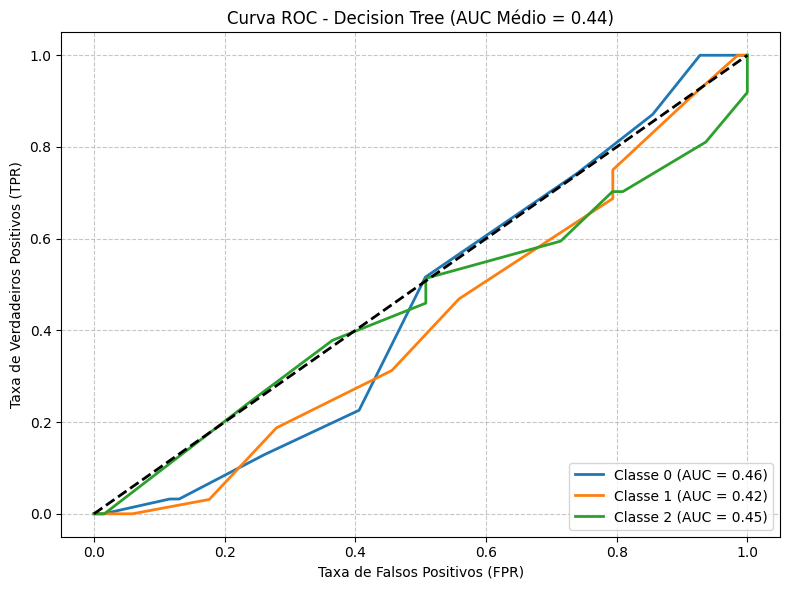

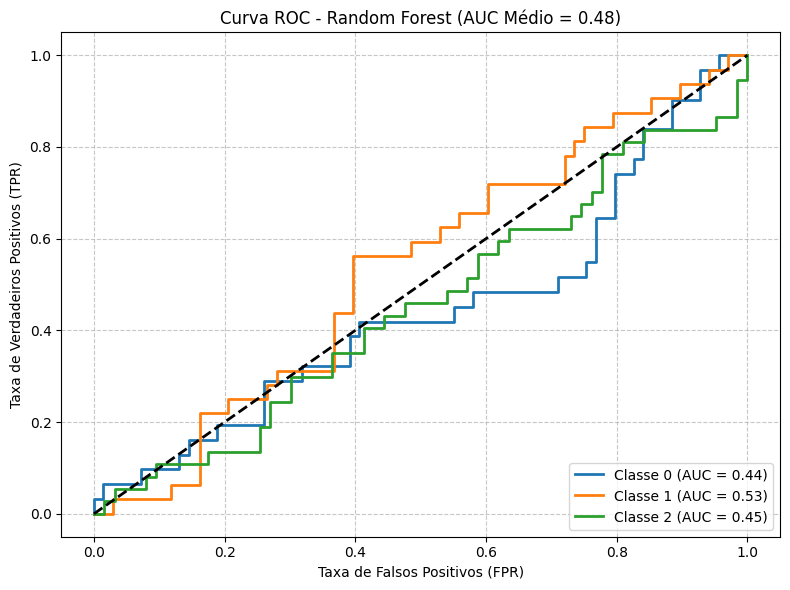

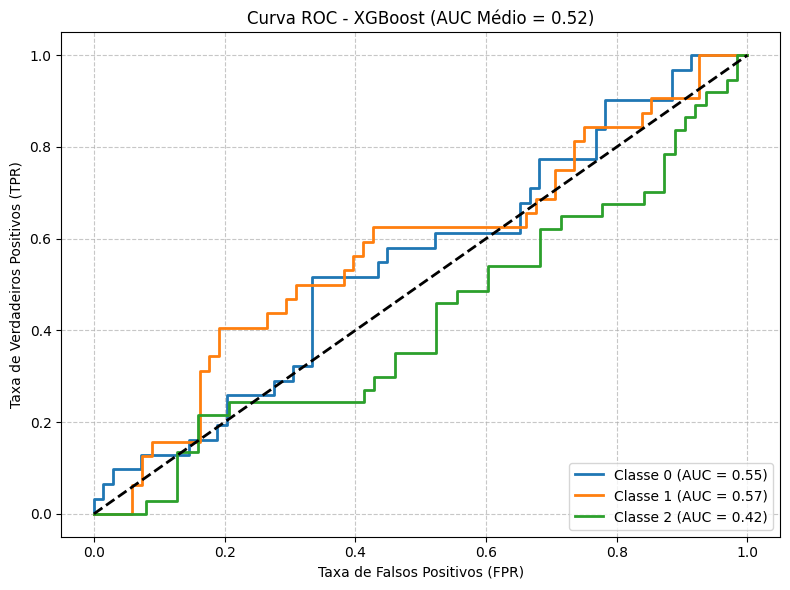

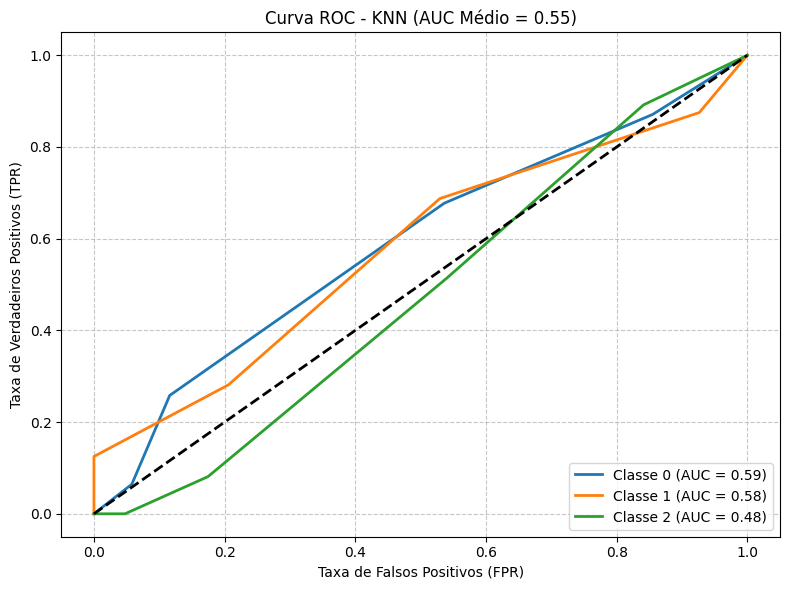

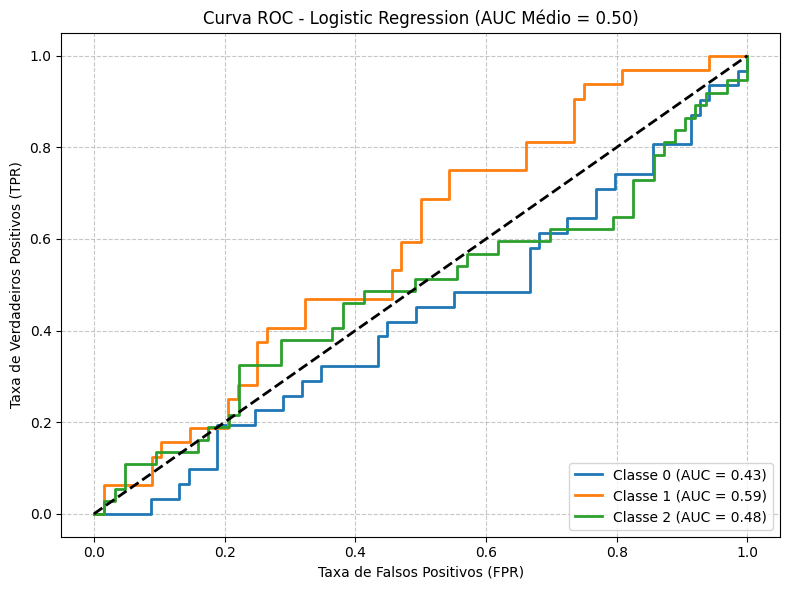

AUC médio por modelo:
Decision Tree: 0.4419
Random Forest: 0.4775
XGBoost: 0.5153
KNN: 0.5479
Logistic Regression: 0.4999


In [ ]:
# 1. Binarizar as labels (transformar em formato one-vs-rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# 2. Dicionário para armazenar as AUCs
auc_dict = {}

# 3. Plotar a curva ROC para cada modelo individualmente
for name, y_prob in y_prob_dict.items():
    # 3.1. Criar uma nova figura para cada modelo
    plt.figure(figsize=(8, 6))

    # 3.2. Calcular a curva ROC e AUC para cada classe (one-vs-rest)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # 3.3. Calcular a média da AUC (macro-average)
    auc_dict[name] = np.mean(list(roc_auc.values()))

    # 3.4. Plotar a curva ROC para cada classe
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

    # 3.5. Personalizar o gráfico
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linha de referência (AUC = 0.5)
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title(f'Curva ROC - {name} (AUC Médio = {auc_dict[name]:.2f})')
    plt.legend(loc="lower right")
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()

    # 3.6. Exibir o gráfico
    plt.show()

# 4. Exibir as AUCs médias
print("AUC médio por modelo:")
for name, auc_value in auc_dict.items():
    print(f"{name}: {auc_value:.4f}")



observação: 'High' -> 0, 'Low' -> 1, 'Moderate' -> 2

##### 8.2.2.Curva Precision-Recall

<ipython-input-102-08f293d5eeba>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", n_classes).colors  # Gera uma paleta de cores automática


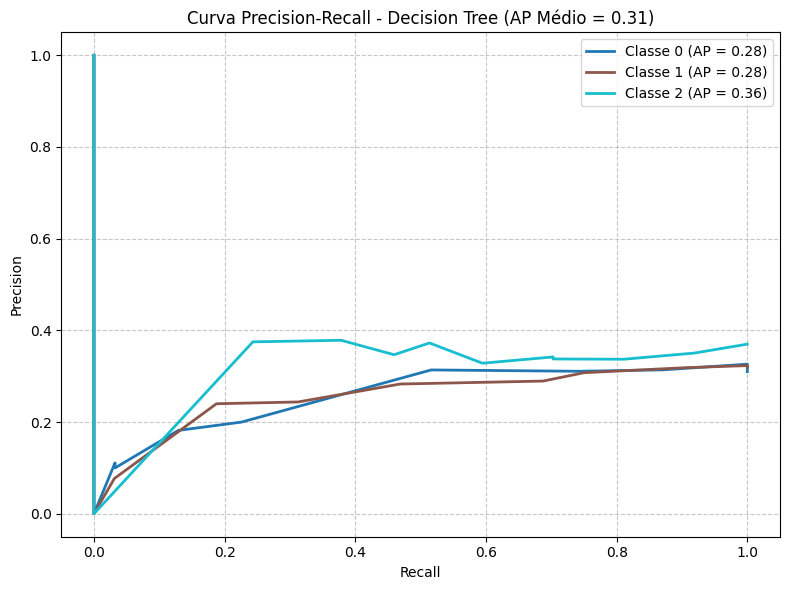

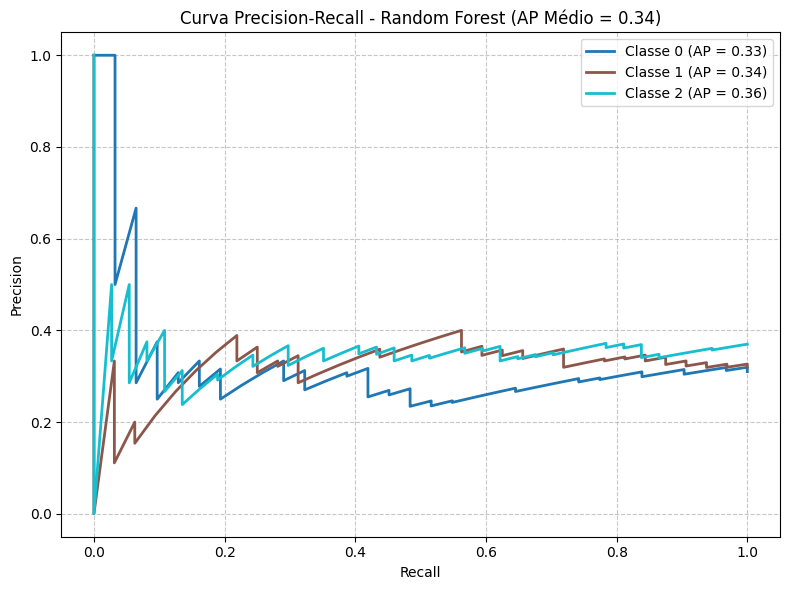

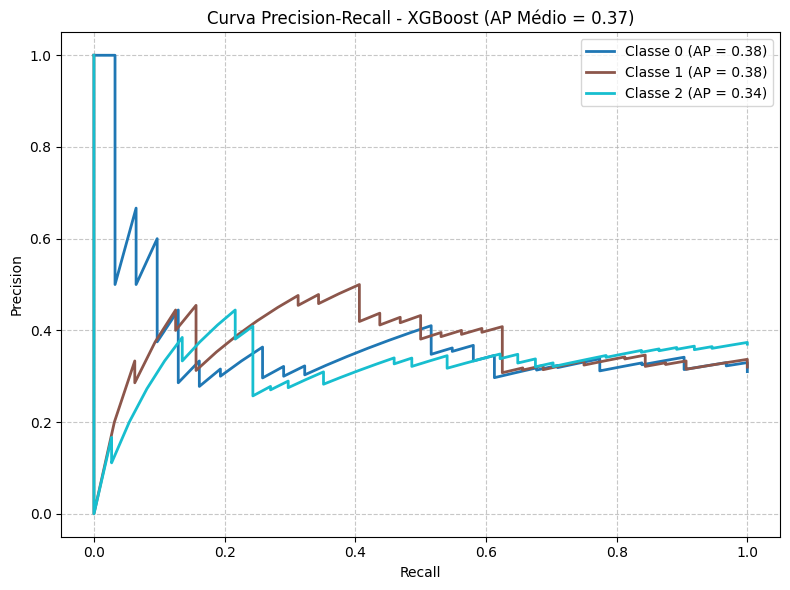

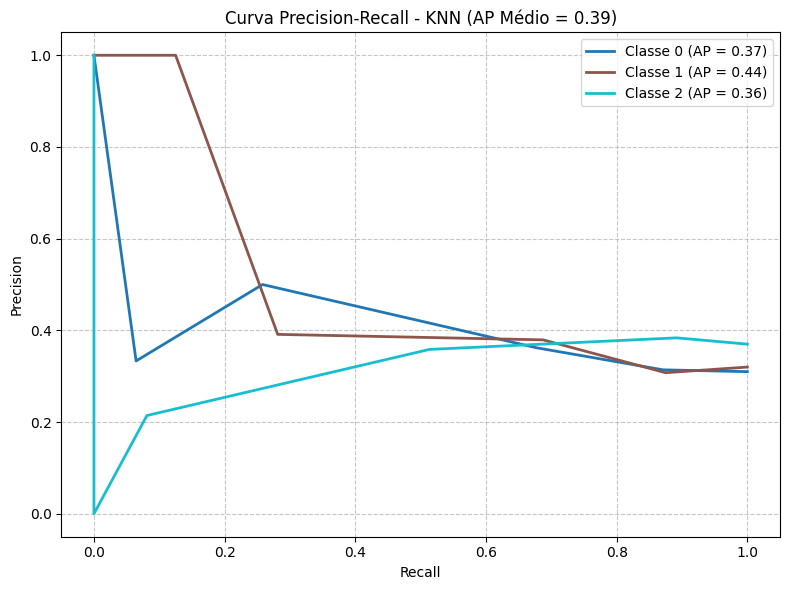

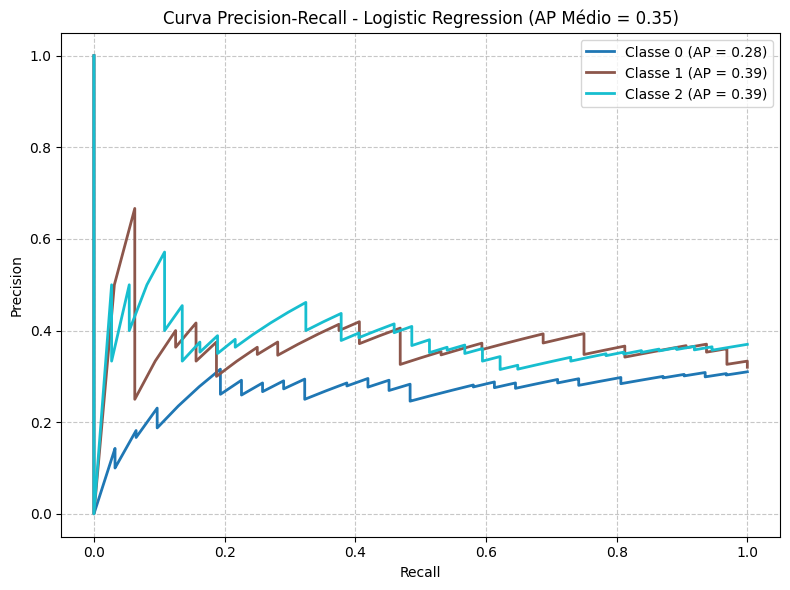


Average Precision (AP) médio por modelo:
Decision Tree: 0.3067
Random Forest: 0.3430
XGBoost: 0.3672
KNN: 0.3888
Logistic Regression: 0.3530


In [ ]:
# 1. Dicionário para armazenar as Average Precisions (AP)
ap_dict = {}

# 2. Define cores suficientes para todas as classes
colors = plt.cm.get_cmap("tab10", n_classes).colors  # Gera uma paleta de cores automática

for name, y_prob_i in y_prob_dict.items():
    # 2.1. Garantir que y_prob_i tenha a mesma quantidade de colunas que y_test_bin
    if y_prob_i.shape[1] != n_classes:
        print(f"Erro: y_prob_i para o modelo '{name}' tem {y_prob_i.shape[1]} classes, esperado {n_classes}. Pulando este modelo.")
        continue

    # 2.2. Criar uma nova figura para cada modelo
    plt.figure(figsize=(8, 6))

    # 2.3. Calcular a curva Precision-Recall e a AP para cada classe (one-vs-rest)
    precision = {}
    recall = {}
    average_precision = {}

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob_i[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob_i[:, i])

    # 2.4. Calcular a média da AP (macro-average)
    ap_dict[name] = np.mean(list(average_precision.values()))

    # 2.5. Plotar a curva Precision-Recall para cada classe
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], color=colors[i], lw=2,
                 label=f'Classe {i} (AP = {average_precision[i]:.2f})')

    # 2.6. Personalizar o gráfico
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Curva Precision-Recall - {name} (AP Médio = {ap_dict[name]:.2f})')
    plt.legend(loc="upper right")
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()

    # 2.7. Exibir o gráfico
    plt.show()

# 3. Exibir as APs médias
print("\nAverage Precision (AP) médio por modelo:")
for name, ap_value in ap_dict.items():
    print(f"{name}: {ap_value:.4f}")


observação: 'High' -> 0, 'Low' -> 1, 'Moderate' -> 2

##### 8.2.3.Relatório de Classificação Detalhado


 Gerando gráfico para o modelo: Decision Tree


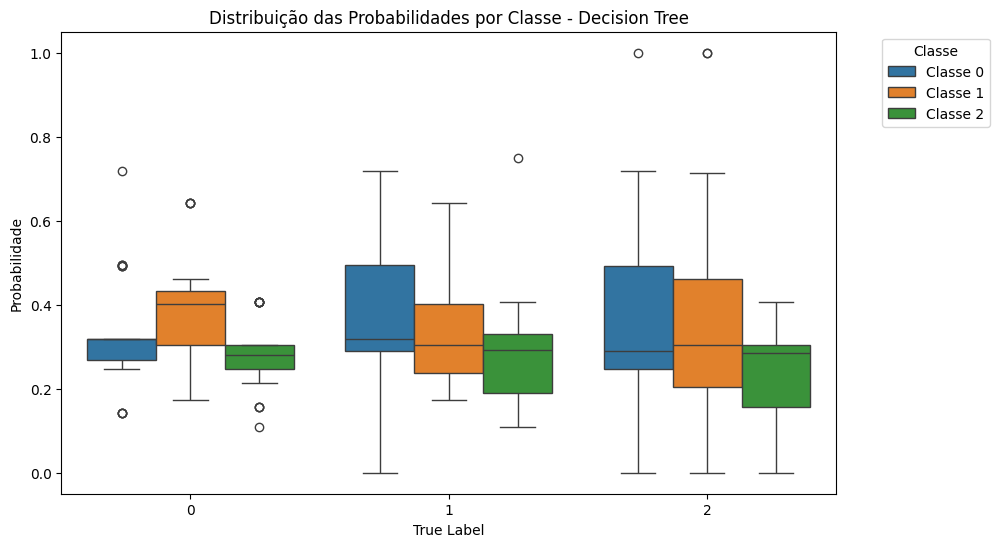


 Gerando gráfico para o modelo: Random Forest


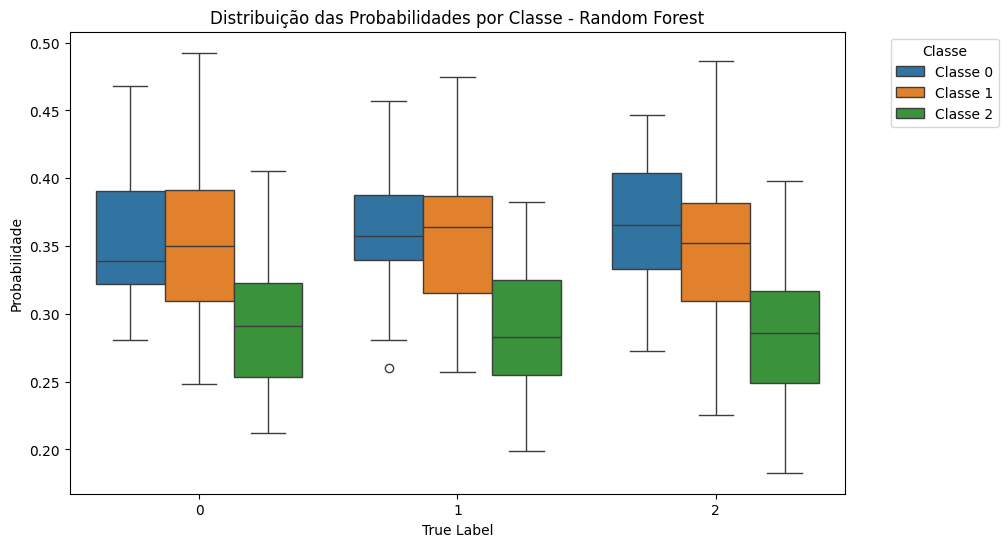


 Gerando gráfico para o modelo: XGBoost


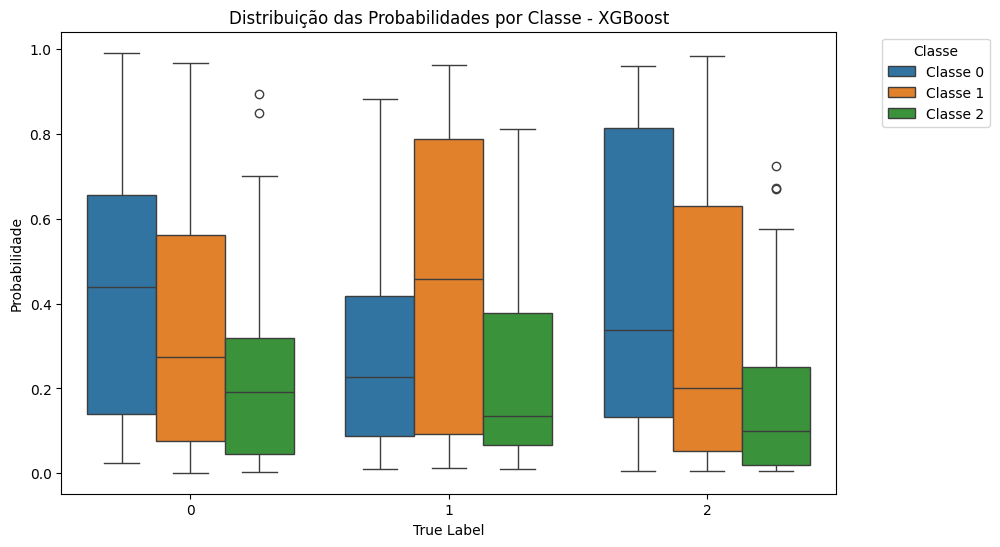


 Gerando gráfico para o modelo: KNN


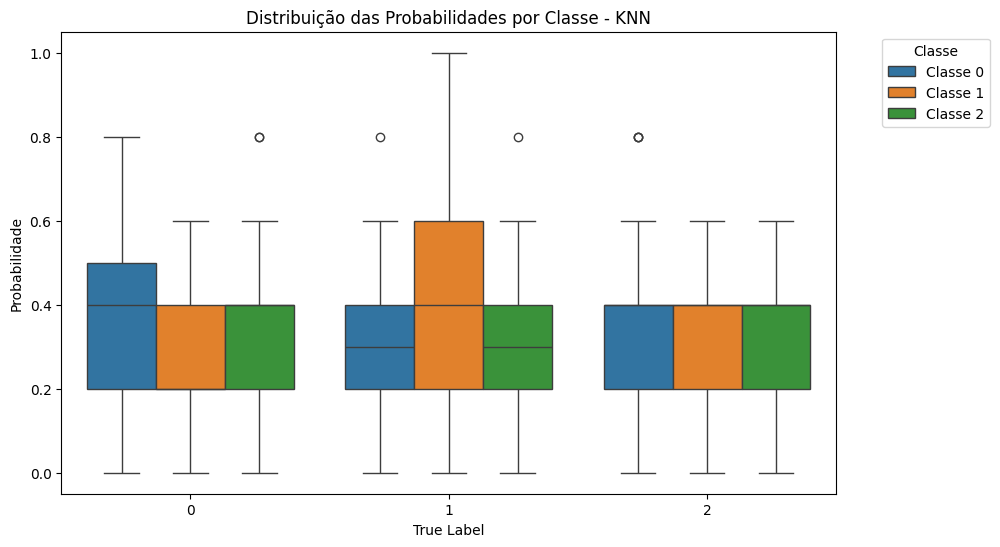


 Gerando gráfico para o modelo: Logistic Regression


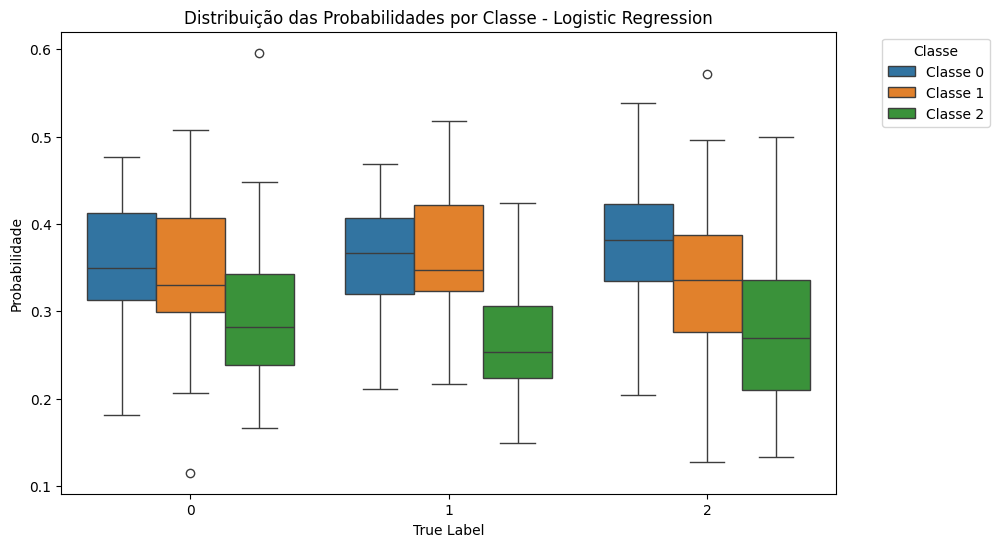

In [ ]:
# 1. Gerar gráficos de distribuição das probabilidades para cada modelo
for name, y_prob in y_prob_dict.items():
    print(f"\n{'='*40}\n Gerando gráfico para o modelo: {name}\n{'='*40}")

    # 1.1. Criar DataFrame com as probabilidades previstas
    y_prob_df = pd.DataFrame(y_prob, columns=[f"Classe {cls}" for cls in np.unique(y_test)])
    y_prob_df["True Label"] = y_test

    # 1.2. Transformar para o formato longo
    y_prob_long = y_prob_df.melt(id_vars=["True Label"], var_name="Class", value_name="Probability")

    # 1.3. Plotar a distribuição das probabilidades
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="True Label", y="Probability", hue="Class", data=y_prob_long)
    plt.title(f"Distribuição das Probabilidades por Classe - {name}")
    plt.xlabel("True Label")
    plt.ylabel("Probabilidade")
    plt.legend(title="Classe", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

observação: 'High' -> 0, 'Low' -> 1, 'Moderate' -> 2

##### 8.2.5.Gráfico de Importância de Features

**observação:** o código abaixo considera diferentes métodos para extrair a importância das features, dependendo do modelo:

Árvores de Decisão e Random Forest: Usa feature_importances_.

XGBoost: Usa feature_importances_.

KNN: Não fornece importâncias diretas, então será ignorado.

Regressão Logística: Usa coef_ (valores absolutos).

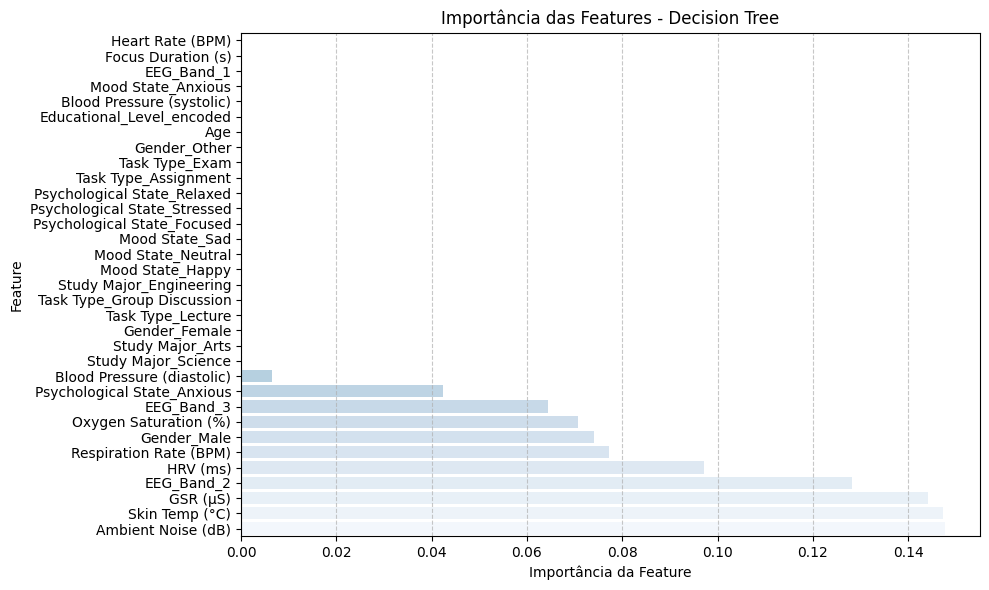

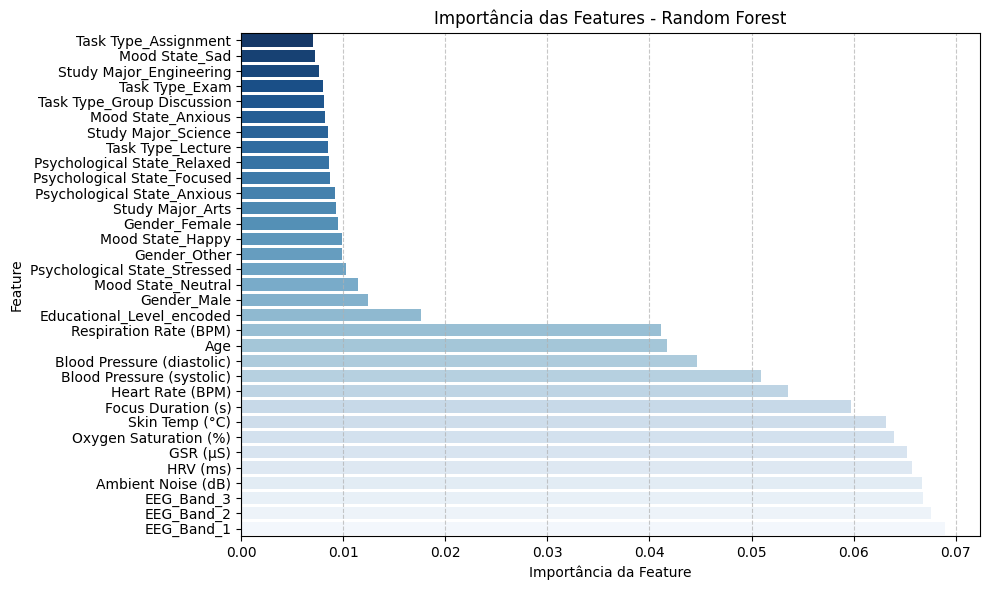

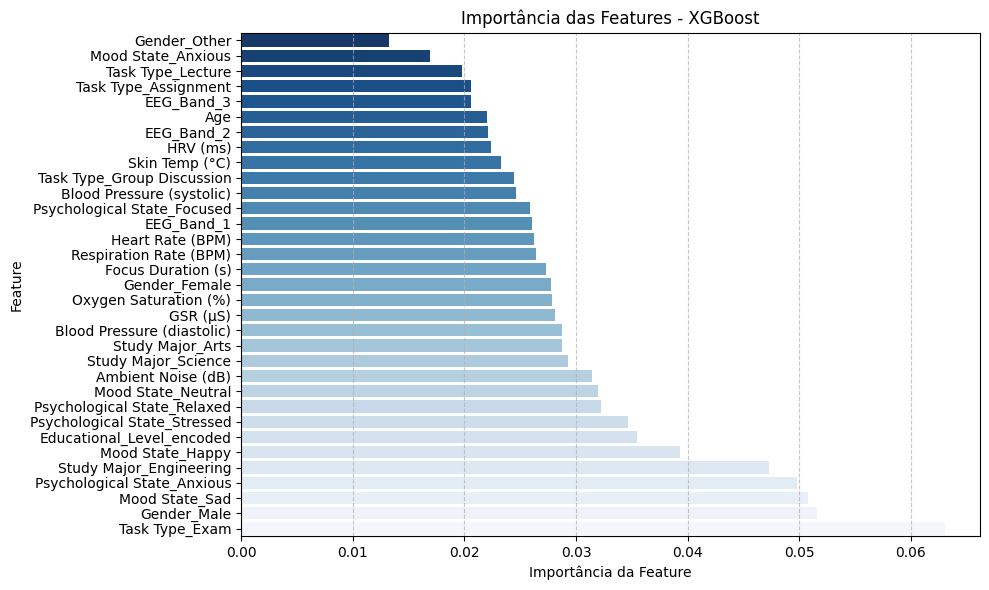

Modelo KNN não fornece importâncias de features diretamente. Pulando...


<Figure size 1000x600 with 0 Axes>

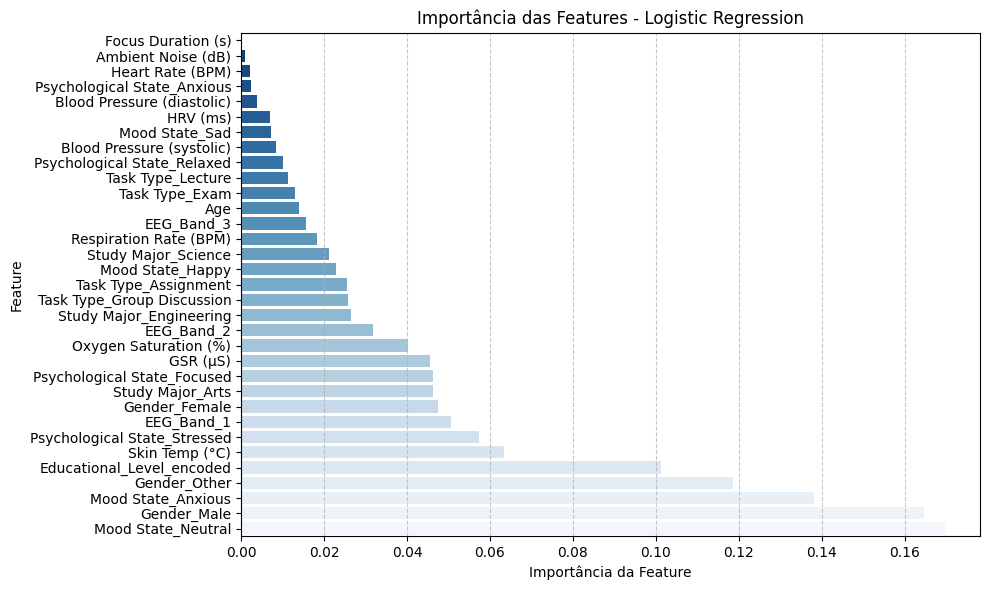

In [ ]:
# 1. Criar um gráfico de importância das features para cada modelo treinado
for name, model in models.items():
    plt.figure(figsize=(10, 6))

    1.1. # Verificar se o modelo tem atributos de importância de features
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
    elif hasattr(model, "coef_"):
        feature_importances = np.abs(model.coef_[0])  # Regressão Logística
    else:
        print(f"Modelo {name} não fornece importâncias de features diretamente. Pulando...")
        continue  # Pular este modelo

    1.2. # Ordenar as features por importância
    feature_names = X.columns
    indices = np.argsort(feature_importances)  # Ordena os índices
    feature_importances_sorted = feature_importances[indices]
    feature_names_sorted = feature_names[indices]

    1.3. # Criar o gráfico
    sns.barplot(x=feature_importances_sorted, y=feature_names_sorted, palette="Blues_r")
    plt.xlabel("Importância da Feature")
    plt.ylabel("Feature")
    plt.title(f"Importância das Features - {name}")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    1.4. # Exibir gráfico
    plt.show()

In [ ]:
# 1. Dicionário para armazenar as importâncias das features
feature_importance_dict = {}

for name, model in models.items():
    # 1.1. Verificar se o modelo possui importância das features
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
    elif hasattr(model, "coef_"):
        feature_importances = np.abs(model.coef_[0])  # Para regressão logística
    else:
        print(f"Modelo {name} não fornece importâncias de features diretamente. Pulando...")
        continue  # Pular este modelo

    # 1.2. Criar um DataFrame com as importâncias
    feature_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "Importance": feature_importances
    })

    # 1.3. Ordenar por importância
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

    # 1.4. Obter as três maiores e três menores features
    top_3 = feature_importance_df.head(3)
    bottom_3 = feature_importance_df.tail(3)

    # 1.5. Armazenar os valores no dicionário
    feature_importance_dict[name] = {
        "Top 3 Mais Importantes": top_3,
        "Top 3 Menos Importantes": bottom_3
    }

    # 1.6. Exibir os resultados
    print(f"\nModelo: {name}")
    print("Top 3 Features Mais Importantes:")
    print(top_3.to_string(index=False))
    print("\nTop 3 Features Menos Importantes:")
    print(bottom_3.to_string(index=False))
    print("-" * 50)


Modelo: Decision Tree
Top 3 Features Mais Importantes:
           Feature  Importance
Ambient Noise (dB)    0.147680
    Skin Temp (°C)    0.147390
          GSR (μS)    0.144192

Top 3 Features Menos Importantes:
                Feature  Importance
       Study Major_Arts         0.0
Study Major_Engineering         0.0
    Study Major_Science         0.0
--------------------------------------------------

Modelo: Random Forest
Top 3 Features Mais Importantes:
   Feature  Importance
EEG_Band_1    0.068924
EEG_Band_2    0.067573
EEG_Band_3    0.066817

Top 3 Features Menos Importantes:
                Feature  Importance
Study Major_Engineering    0.007683
         Mood State_Sad    0.007214
   Task Type_Assignment    0.007053
--------------------------------------------------

Modelo: XGBoost
Top 3 Features Mais Importantes:
       Feature  Importance
Task Type_Exam    0.063032
   Gender_Male    0.051621
Mood State_Sad    0.050755

Top 3 Features Menos Importantes:
           Feature 

##### 8.2.6.Gráfico de Erros (Resíduos)

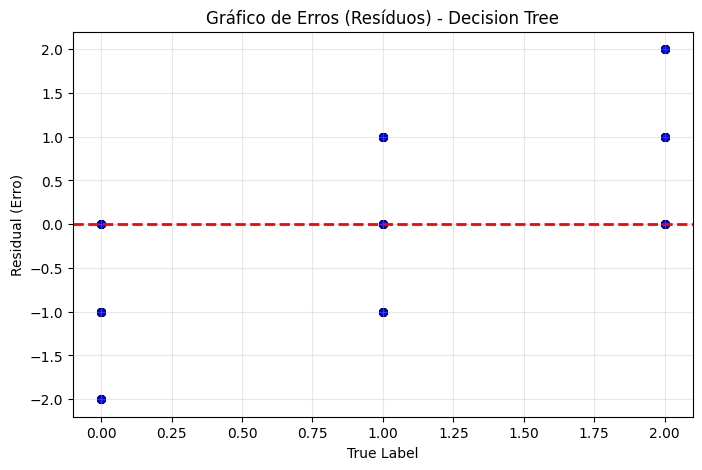

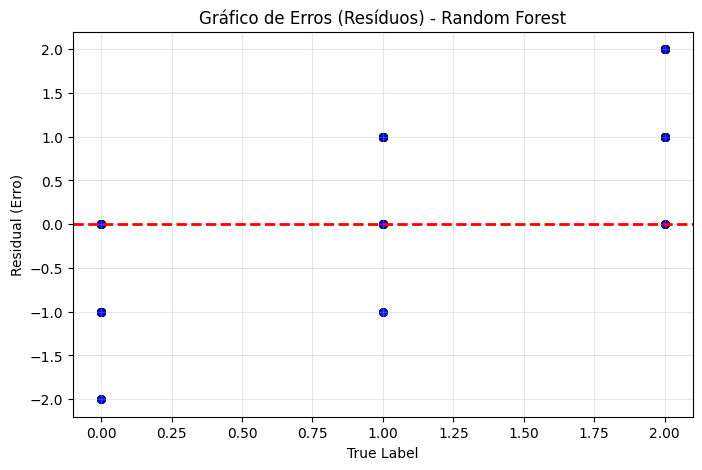

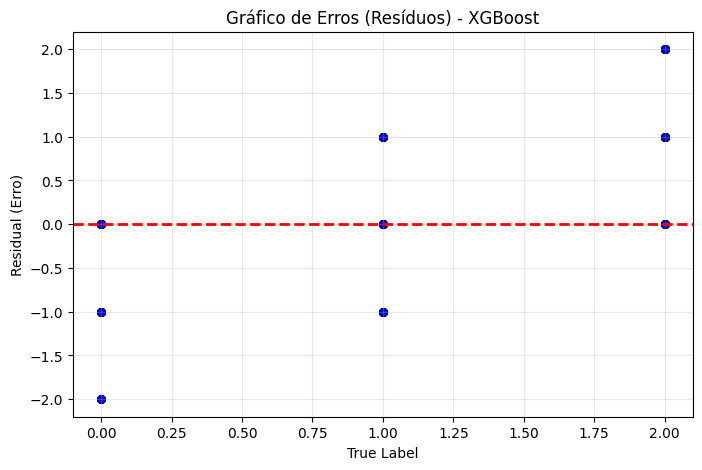

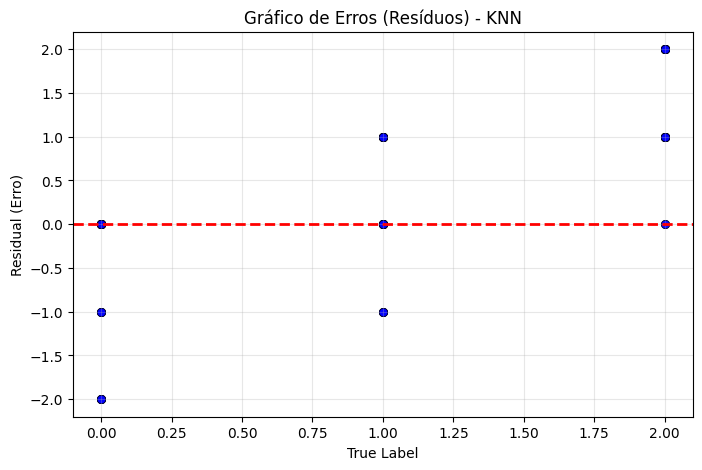

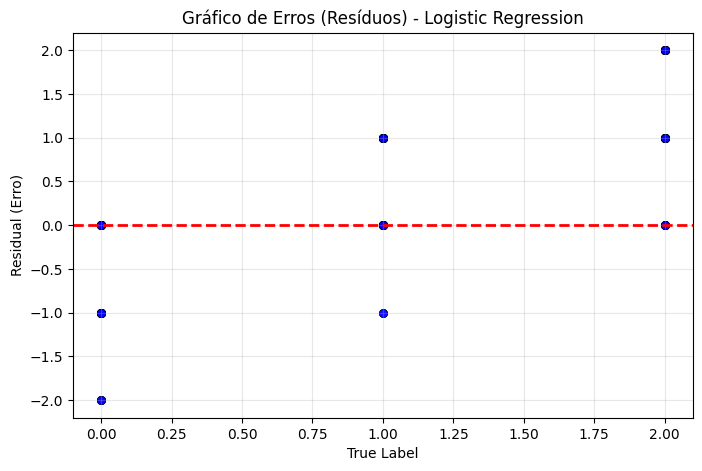

In [ ]:
# 1. Criar os gráficos de resíduos para cada modelo
for name, model in models.items():
    # 1.1. Prever os valores no conjunto de teste
    y_pred = model.predict(X_test)

    # 1.2. Calcular os resíduos (erro = verdadeiro - previsto)
    residuals = y_test - y_pred

    # 1.3. Criar o gráfico de resíduos
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=residuals, alpha=0.6, color='blue', edgecolor='black')

    # 1.4. Adicionar linha de referência no zero (erro zero)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

    # 1.5. Personalizar o gráfico
    plt.xlabel("True Label")
    plt.ylabel("Residual (Erro)")
    plt.title(f"Gráfico de Erros (Resíduos) - {name}")
    plt.grid(alpha=0.3)

    # 1.6. Exibir o gráfico
    plt.show()

In [ ]:
importance = permutation_importance(models["Random Forest"], X_test, y_test, scoring="accuracy")
print(importance.importances_mean)  # Importância média das features

[ 0.016  0.004 -0.02  -0.012  0.016  0.016  0.012 -0.018 -0.016  0.02
 -0.004  0.004  0.02   0.006  0.01   0.004  0.01  -0.018  0.002  0.008
 -0.006  0.018  0.044 -0.002  0.01  -0.002  0.01   0.012  0.008  0.006
  0.006 -0.014 -0.006]


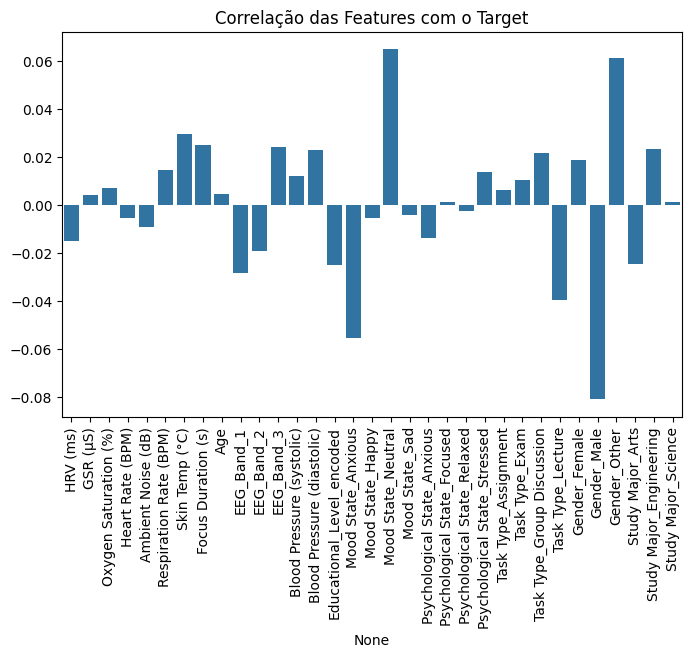

In [ ]:
y_series = pd.Series(y, index=X.index)  # Garante que y tem o mesmo índice que X

correlation_matrix = X.corrwith(y_series, method="spearman")

plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
plt.xticks(rotation=90)
plt.title("Correlação das Features com o Target")
plt.show()

##### 8.2.7.Matriz de confusão

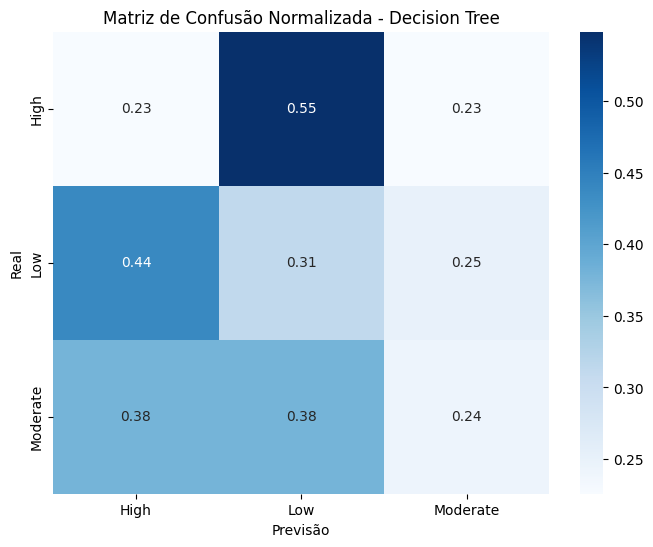

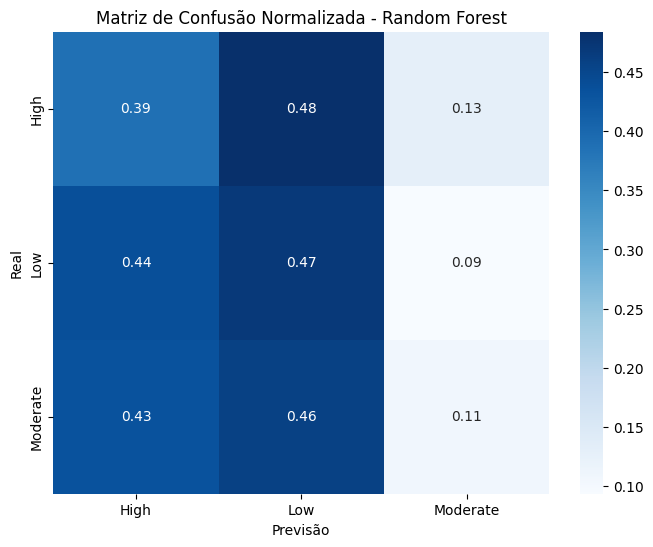

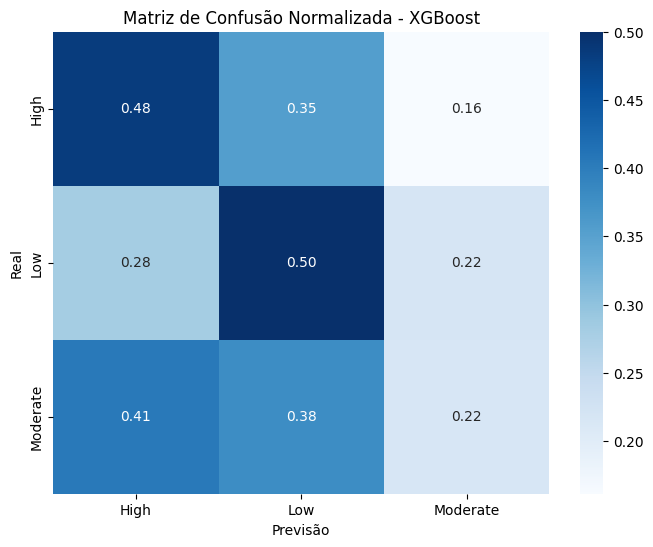

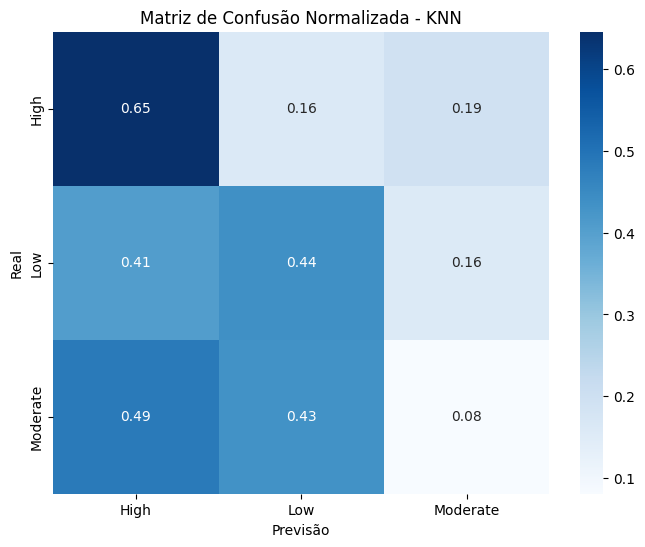

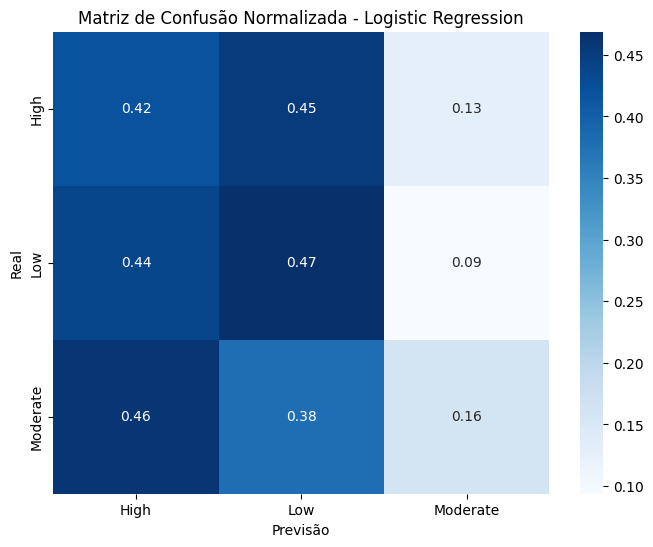

In [ ]:
# 1. Rótulos das classes
class_labels = ['High', 'Low', 'Moderate']

# 2. Iterar sobre cada modelo treinado
for name, model in models.items():
    # 2.1. Fazer previsões
    y_test_pred = model.predict(X_test)

    # 2.2. Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_test_pred)

    # 2.3. Normalizar a matriz de confusão
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # 2.4. Criar o gráfico da matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=True,
                xticklabels=class_labels, yticklabels=class_labels)

    # 2.5. Adicionar títulos e rótulos
    plt.xlabel("Previsão")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão Normalizada - {name}")

    # 2.6. Mostrar a matriz de confusão para cada modelo
    plt.show()

##### 8.2.8.Learning Curve (Curva de Aprendizado)

Gerando curva de aprendizado para Decision Tree...


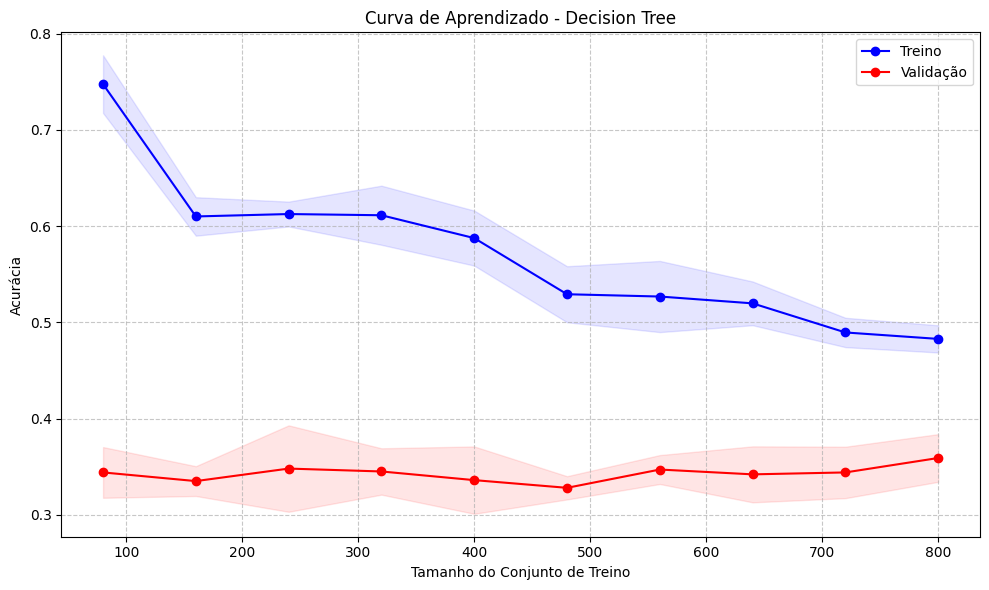

Gerando curva de aprendizado para Random Forest...


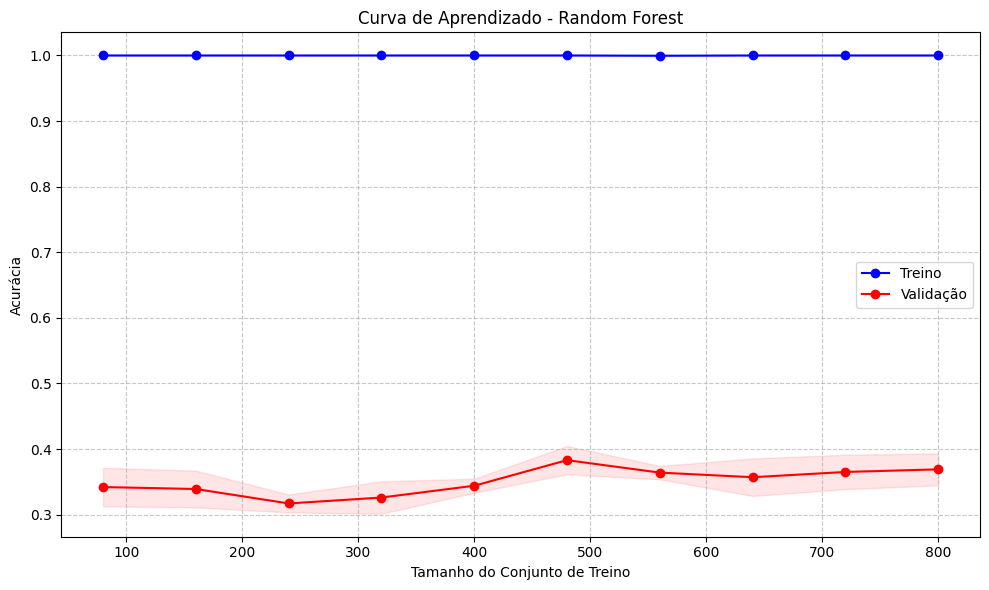

Gerando curva de aprendizado para XGBoost...


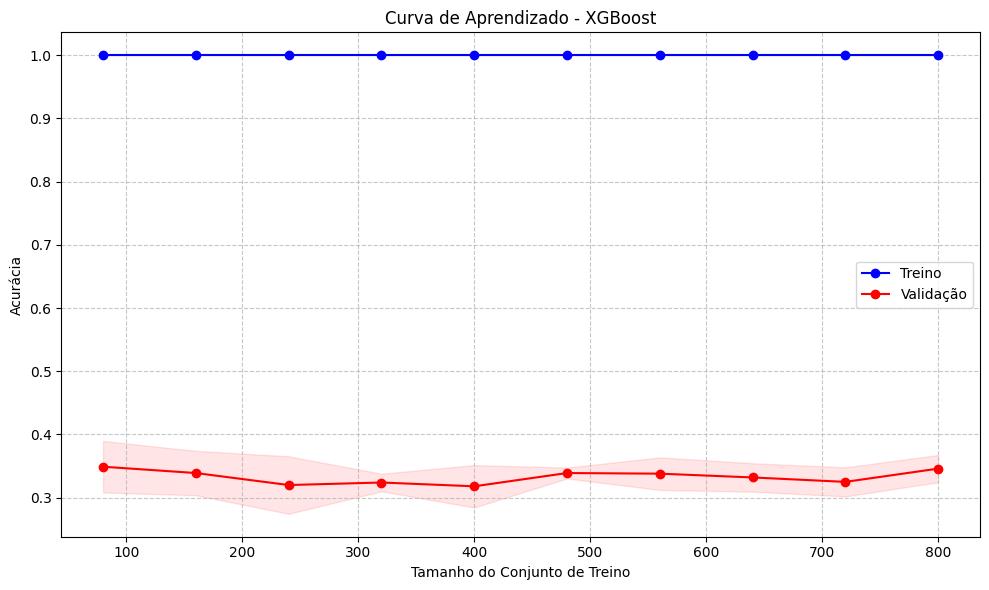

Gerando curva de aprendizado para KNN...


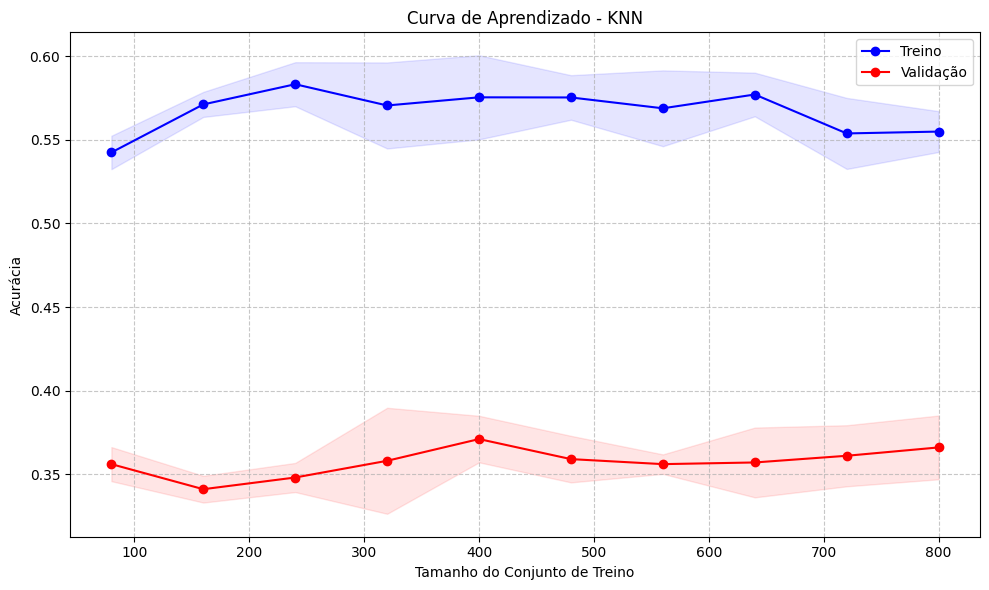

Gerando curva de aprendizado para Logistic Regression...


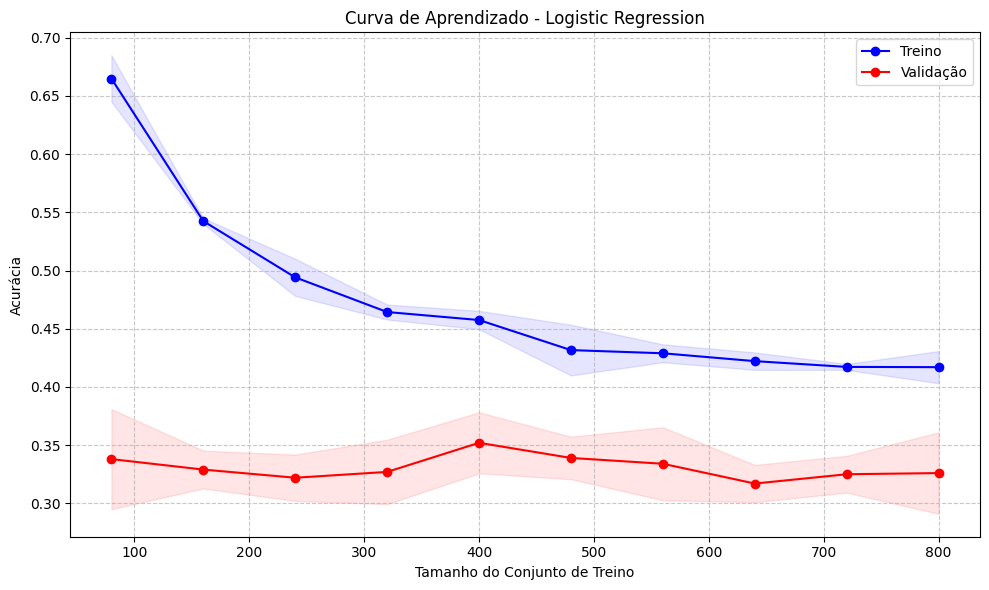

In [ ]:
# 1. Iterar sobre cada modelo treinado
for name, model in models.items():
    print(f"Gerando curva de aprendizado para {name}...")

    # 1.1. Calcular a curva de aprendizado
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,  # Modelo treinado
        X=X,
        y=y,
        cv=5,  # Número de folds na validação cruzada
        scoring="accuracy",  # Métrica de avaliação
        n_jobs=-1,  # Usar todos os núcleos do processador
        train_sizes=np.linspace(0.1, 1.0, 10)  # Tamanhos relativos do conjunto de treino
    )

    # 1.2. Calcular médias e desvios padrão
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # 1.3. Plotar a curva de aprendizado
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Treino", color="blue", marker="o")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
    plt.plot(train_sizes, test_mean, label="Validação", color="red", marker="o")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.1)

    # 1.4. Personalizar o gráfico
    plt.xlabel("Tamanho do Conjunto de Treino")
    plt.ylabel("Acurácia")
    plt.title(f"Curva de Aprendizado - {name}")
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

### 9. Discussão

#### 9.1.Discussão dos resultados obtidos na fase de testes

Com o objetivo de discutir os resultados encontrados pelo teste (tópico 8.1) e suas avaliações (tópico 8.2) serão apresentadas descrições e explicações acerca dos indices e gráficos gerados. Por uma questão de organização as discussões serão feitas seguindo os a ordem de apresentação dos tópicos e a conclusão será apresentada no tópico 9.2.

**Tópico 8.1.Testando os modelos otimizados**

Os resultados mostram que o modelo KNN teve o melhor desempenho na validação (0.40 de acurácia), mas no teste sua acurácia caiu para 0.37, indicando uma possível sobreajuste. O XGBoost, que teve um desempenho mais fraco na validação (0.30 de acurácia), obteve a melhor performance no teste (0.39 de acurácia e 0.3770 de F1-score), sugerindo uma maior generalização. O Random Forest e o Decision Tree tiveram desempenhos semelhantes, mas com leve vantagem para o Random Forest em termos de recall e precisão, o que reforça sua robustez. A Regressão Logística teve desempenho intermediário, com acurácia de 0.34 no teste, mas dificuldade em prever corretamente a classe 2. O SVM teve um desempenho fraco, especialmente para a classe "Moderate", onde recall e precisão foram muito baixos. De maneira geral, os resultados indicam que o XGBoost e o KNN foram os modelos mais promissores, com o XGBoost mostrando melhor generalização nos dados de teste.

**Tópico 8.2.1.Curva ROC e AUC (Área sob a Curva)**

A Curva ROC ideal se aproxima do canto superior esquerdo, indicando um modelo que identifica corretamente todos os positivos sem falsos positivos, enquanto a linha diagonal representa um classificador aleatório e ineficaz. Entre os modelos analisados, a Decision Tree e o Random Forest apresentaram curvas próximas à diagonal, indicando baixo desempenho, com as classes predominantemente voltadas para o canto inferior direito. O XGBoost e o KNN apresentaram melhores resultados, com algumas classes voltadas para o canto superior esquerdo, mas a classe 2 mostrou maior dificuldade de classificação. A Regressão Logística teve desempenho próximo ao aleatório, com uma AUC de 0.4999, enquanto o KNN obteve a melhor AUC média (0.5479), seguido pelo XGBoost (0.5153). A Decision Tree (0.4419) e o Random Forest (0.4775) apresentaram AUC abaixo de 0.5, indicando baixo poder de discriminação entre as classes. Modelos mais simples, como o KNN, superaram os mais complexos, embora todos enfrentem desafios na precisão de classificação.

**Tópico 8.2.2.Curva Precision-Recall**

Os resultados de Average Precision (AP) indicam que o KNN obteve o melhor desempenho com um valor de 0.3888, seguido de perto pelo XGBoost, com 0.3672, o que sugere que esses modelos possuem uma boa capacidade de identificar corretamente as classes, especialmente em um contexto de desequilíbrio de classes (embora no presente caso não há grande desequilíbrio das classes, ver Tópico 3.2.1.), dado que a métrica AP considera a precisão em diferentes níveis de recall. A Regressão Logística também obteve um desempenho razoável com 0.3530, mas não superou o XGBoost, indicando uma capacidade moderada de classificar as classes corretamente, embora ainda com algumas limitações. O Random Forest com 0.3430 e a Decision Tree com 0.3067 apresentaram os piores resultados, sugerindo que, embora esses modelos possam identificar algumas classes, sua capacidade geral de classificar corretamente, especialmente em termos de precisão média, é inferior aos outros modelos. Em geral, os modelos mais simples, como o KNN, mostram-se mais eficazes que os modelos mais complexos, como Random Forest e Decision Tree, em termos de precisão média.

**Tópico 8.2.3.Relatório de Classificação Detalhado**

Os modelos apresentam desempenhos distintos na classificação das classes High, Low e Moderate. No Decision Tree, há maior probabilidade de classificar High como Low (erro), com dubiedade entre as classes devido ao tamanho dos boxplots. O Random Forest também mostra dubiedade, classificando High como Low (erro) e Moderate como High (erro), embora Low seja corretamente classificada. O XGBoost tem maior precisão nas medianas, acertando High e Low, mas com boxplots grandes indicando incerteza, enquanto Moderate é frequentemente classificada como High (erro). O KNN acerta High e Low, mas com alta dubiedade devido aos boxplots grandes, e Moderate apresenta resultados idênticos para todas as classes. Já a Regressão Logística acerta High, mas classifica Low e Moderate como High (erro), com boxplots similares, exceto por Moderate, que tem maior dubiedade ao acertar. Em geral, os modelos mostram dificuldade em distinguir Moderate, com maior precisão em High e Low, mas com incertezas significativas.

**Tópico 8.2.5.Gráfico de Importância de Features**

Os resultados das importâncias das features para os diferentes modelos mostram padrões distintos de quais variáveis têm maior impacto nas previsões de cada modelo. Para o Decision Tree, as três features mais importantes foram Ambient Noise (dB), Skin Temp (°C) e GSR (μS), com valores de importância semelhantes, sugerindo que fatores físicos ou ambientais têm um papel crucial na tomada de decisão do modelo. Por outro lado, as features relacionadas aos estudos de maior área, como Study Major_Arts, Study Major_Engineering e Study Major_Science, não foram consideradas importantes, com importância igual a zero. O Random Forest destacou as bandas de EEG (EEG_Band_1, EEG_Band_2 e EEG_Band_3) como as mais importantes, enquanto features como Study Major_Engineering, Mood State_Sad e Task Type_Assignment foram muito menos relevantes. O XGBoost apresentou Task Type_Exam, Gender_Male e Mood State_Sad como as features mais influentes, enquanto variáveis como Task Type_Lecture e Mood State_Anxious mostraram baixa importância. No caso da Logistic Regression, as variáveis Mood State_Neutral e Gender_Male emergiram como as mais significativas, ao passo que características fisiológicas como Heart Rate (BPM) e Ambient Noise (dB) tiveram uma importância praticamente nula. Já o KNN não oferece uma forma direta de avaliar a importância das features, o que limita a análise comparativa com os outros modelos. No geral, as variáveis relacionadas a estados emocionais e características fisiológicas parecem ser mais influentes em alguns modelos, enquanto informações relacionadas à área de estudo ou características de tarefas têm menos impacto.

**Tópico 8.2.6.Gráfico de Erros (Resíduos)**

Quando os Gráficos de Erros (Resíduos) de diferentes modelos são idênticos, isso pode indicar que os modelos têm desempenho semelhante, cometendo erros parecidos nas previsões, seja porque os dados são simples e lineares, limitando a capacidade dos modelos de capturar padrões adicionais, ou porque todos sofrem de overfitting (ajustando-se demais ao ruído) ou underfitting (não capturando a complexidade dos dados). Além disso, problemas como dados com pouca variabilidade, features pouco informativas ou implementação incorreta também podem levar a resíduos idênticos. Para entender melhor, é essencial analisar a qualidade dos dados, a complexidade dos modelos e comparar outras métricas de desempenho.

**Tópico 8.2.7.Matriz de confusão**

Os resultados dos cinco modelos apresentados indicam uma performance mista, com variações nas métricas de precisão, recall e F1-score, dependendo do modelo. O Decision Tree teve a menor acurácia (0.26) e desempenho geral, com valores de precisão e recall mais baixos para todas as classes, principalmente para a classe 0 (precisão de 0.20 e recall de 0.23). O Random Forest obteve uma ligeira melhoria, com acurácia de 0.31, mas ainda apresentou dificuldades para lidar com a classe 2, resultando em um F1-score de 0.17. O XGBoost se destacou com a maior acurácia (0.39), embora ainda tenha apresentado desafios para a classe 2, com F1-score de 0.28. O KNN teve boa performance na classe 0 (precisão de 0.39 e recall de 0.65), mas teve um desempenho ruim na classe 2 (precisão de 0.21 e recall de 0.08), resultando em um F1-score médio de 0.33. O Logistic Regression, com acurácia de 0.34, teve bom desempenho para a classe 2, mas sua precisão para a classe 0 foi apenas 0.30, refletindo uma performance razoável, mas ainda abaixo dos modelos mais robustos como o XGBoost. A análise revela que os modelos como XGBoost e KNN apresentaram melhor desempenho na classe 0, enquanto a classe 2 foi um desafio para a maioria dos modelos, especialmente para o Random Forest e KNN.


**Tópico 8.2.8.Learning Curve (Curva de Aprendizado)**

Em todos os modelos a curva de validação apresenta um baixo desempenho e praticamente linear. Curva de validação linear e de baixo desempenho indica que os modelos não estão aprendendo padrões úteis ou generalizando bem. As causas podem incluir underfitting, dados insuficientes, features não informativas ou hiperparâmetros mal ajustados. Em se tratando da curva de treino os modelos Decision Tree e Logistic Regression a possuem na forma de uma curva decrescente, indo de alta acurácia para baixos valores da mesma. Essa situação pode ser interpretada como Underfitting (Subajuste) onde ambas as curvas (treinamento e validação) atingem um desempenho baixo, mesmo com o aumento do tamanho do conjunto de treinamento. Isso ocorre quando o modelo é muito simples para capturar os padrões dos dados. Os modelos de Random Forest e XGBoost possuem uma curva de aprendizado de treino que é uma reta com valor 1 de acurácia (ou seja, 100% de acurácia), o que indica que o modelo está atingindo perfeição no conjunto de treinamento, independentemente do tamanho do conjunto de dados. Isso indica um Overfitting Extremo onde o modelo pode estar memorizando os dados de treinamento em vez de aprender padrões generalizáveis. Isso ocorre quando o modelo é excessivamente complexo e se ajusta perfeitamente aos dados de treinamento, incluindo o ruído. Por fim o modelo KNN possui uma curva de aprendizado de treino oscilando pouco ao redor da acurácia de 0.55, isso indica que o modelo está tendo um desempenho ruim no conjunto de treinamento, próximo ao de um chute aleatório. Essa situação sugere que o modelo não está aprendendo padrões significativos dos dados. O que resulta em um Underfitting (Subajuste) na qual o modelo pode ser muito simples para capturar a complexidade dos dados. Isso ocorre quando o modelo não tem capacidade suficiente para aprender os padrões subjacentes, resultando em um desempenho ruim tanto no treinamento quanto na validação.

#### 9.2.Conclusão

Os resultados apresentados indicam que, entre os modelos testados, o XGBoost obteve o melhor desempenho geral, com a maior acurácia e um equilíbrio entre precisão e recall, seguido pelo KNN, que se destacou em algumas métricas, como a AUC e o Average Precision. No entanto, todos os modelos apresentaram dificuldades na classificação, especialmente para a classe 2, o que sugere desafios na separação das classes. Além disso, as curvas de aprendizado revelaram problemas como overfitting no XGBoost e Random Forest e underfitting em modelos como Decision Tree e Logistic Regression, indicando a necessidade de ajustes nos hiperparâmetros ou uma abordagem diferente para a modelagem dos dados. A análise das features mostrou que variáveis relacionadas a estados emocionais e características fisiológicas tiveram maior influência, enquanto aspectos como a área de estudo tiveram impacto reduzido. No geral, os resultados sugerem que melhorias na engenharia de features, maior refinamento dos modelos e a possível utilização de um conjunto de dados mais representativo poderiam contribuir para um melhor desempenho na tarefa de classificação.


**Resposta da pergunta alvo:** com o dataset utilizado não foi possível a construção de um modelo eficiente, prático e aplicável ao mundo real. Portanto, respaldada pelo que foi aqui apresentado conclímos que não foi possível construir um modelo confiável capaz de predizer a carga cognitiva de uma pessoa.

### 10.Perspectivas futuras

Mediante as conclusões obtidas podemos constatar que o dataset necessita de um melhoramento (Feature engineering) por meio do acrescimo de novas features que apresentem uma melhor correlação com o target. Além disso, no cenário estabelecido ficou evidente que features relacionadas a estados emocionais e características fisiológicas tiveram maior influência. Com isso talvez obtenhamos melhores resultados no treino e teste dos modelos.

Um cenário futuro promissor seria a utilização de redes neurais recorrentes (RNN) em datasets com features referentes aos estados emocionais e características fisiológicas. Só que para que isso seja possível, além do Feature engineering sugerido seria necessário um aumento em grande escala das amostras. Com isso podíamos aplicar uma abordagem inovadora de RNN conhecidas por EOO-DLSTM (Emotion-Oriented Optimization - Deep Long Short-Term Memory). Esse modelo de machine learning, foca na análise de estados psicológicos e emocionais. Ao unir a capacidade das redes Long Short-Term Memory (LSTM) de processar dados sequenciais com técnicas de otimização voltadas para emoções, esses modelos oferecem um grande potencial para pesquisas futuras. Combinados com tecnologias emergentes e práticas éticas, os EOO-DLSTM podem aprimorar a precisão, expandir aplicações, integrar novas ferramentas e garantir privacidade e interpretabilidade dos resultados. Com esses avanços, eles podem se tornar fundamentais para melhorar o bem-estar emocional e psicológico em áreas como educação, saúde mental e além.